In [51]:
import pandas as pd
import numpy as np
import os
import env
import matplotlib.pyplot as plt
import seaborn as sns

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

from math import sqrt
import scipy.stats as stats

#import explore
#import acquire

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
****

For WebDev cohorts: Java-i, for Data Science: Classification

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
****

I did not find this phenomenon within WebDev cohorts, but I did within the DataScience cohorts.
All but Bayes accessed the MySql lesson within their top 5 accessed.  

In [173]:
#look at top lessons between cohorts per program. compare.

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
****

It appears that students who hardly access the curriculum only access near their start date. This indicates they could be students who do not continue with the program.

In [174]:
#look at user_id counts average. Look at time to see if you can eliminate those who dropped the program


4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
****
There is an unusually high spike of activity around 10:20 pm in the Zion Cohort for less than 10 minutes. Network Security may want to look into the overnight activity of this cohort.

In [ ]:
#look into the access from 999 id. #look at ip address access over time.

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
****

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
****
## Program 1: Post Graduation, graduates are most likely going to access: Javascript-i,HTML-CSS,spring                                                  


## Program 2: Post Graduation, graduates are most likely going to access: Javascript-i, Spring, HTML-CSS                               
   

## Program 3: Post Graduation, graduates are most likely going to access: sql/mysql-overview, classification/overview, anomaly-detection/overview 


In [175]:
#Check out end date for cohorts. Then look at what they are viewing.

7. Which lessons are least accessed?
****

8. Anything else I should be aware of?
****

In [61]:
#to be placed into acquire.py module
import pandas as pd
import numpy as np
import os
import env


def new_data():
    '''
    This function takes in a csv and a sql file, 
    converts nulls and datatype in key column 'cohort_id'
    conversion is to make merge run without error
    then merge the df's together
    returns a merged pandas dataframe with data from both files
    '''
    #read in csv
    #cohort = pd.read_csv('cohorts.csv')
    #read in sql
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
    #df1 = pd.read_sql('SELECT * FROM logs', url)
    df = pd.read_sql('SELECT logs.date AS access_date, logs.time, logs.path, logs.user_id, logs.ip, logs.cohort_id, cohorts.name AS cohort_name, cohorts.start_date, cohorts.end_date, cohorts.program_id FROM logs LEFT JOIN cohorts ON logs.cohort_id = cohorts.id;', url)
    #fill in NaN values in 'cohort_id' with 999 as a numeric identifier
    df['cohort_id'] = df['cohort_id'].fillna(999)
    df['program_id'] = df['program_id'].fillna(999)
    #cast cohort_id as int type
    df['cohort_id'] = df['cohort_id'].astype(int)
    df['program_id'] = df['program_id'].astype(int)
    #merge dataframes together on cohort_id
    #df = pd.merge(df1, cohort, left_on='cohort_id', right_on='cohort_id', how='left')
    #convert date columns to datetime format
    df['access_date'] = pd.to_datetime(df['access_date'])
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])
    
    return df

In [62]:
df = new_data()

In [63]:
df.head()

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   access_date  900223 non-null  datetime64[ns]
 1   time         900223 non-null  object        
 2   path         900222 non-null  object        
 3   user_id      900223 non-null  int64         
 4   ip           900223 non-null  object        
 5   cohort_id    900223 non-null  int64         
 6   cohort_name  847330 non-null  object        
 7   start_date   847330 non-null  datetime64[ns]
 8   end_date     847330 non-null  datetime64[ns]
 9   program_id   900223 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 68.7+ MB


In [6]:


#may need to take a look at program_id and change that datatype like you did with cohort_id.

#there are questions regarding program_id and path. That will give me an idea of what programs are and if the programs are viewing relevant curriculum

#users part of multiple names?



In [65]:
#df['time'] = pd.to_datetime(df['time'], format="%H%M%S")
df['time'] = pd.to_datetime(df['time'],format= '%H:%M:%S' ).dt.time

In [66]:
df.head(1)

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   access_date  900223 non-null  datetime64[ns]
 1   time         900223 non-null  object        
 2   path         900222 non-null  object        
 3   user_id      900223 non-null  int64         
 4   ip           900223 non-null  object        
 5   cohort_id    900223 non-null  int64         
 6   cohort_name  847330 non-null  object        
 7   start_date   847330 non-null  datetime64[ns]
 8   end_date     847330 non-null  datetime64[ns]
 9   program_id   900223 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 68.7+ MB


In [68]:
df[(df.cohort_id != 999)].path.value_counts().head(20)

/                                                                            45854
javascript-i                                                                 18203
toc                                                                          17591
search/search_index.json                                                     17534
java-iii                                                                     13166
html-css                                                                     13127
java-ii                                                                      12177
spring                                                                       11883
jquery                                                                       11041
mysql                                                                        10611
java-i                                                                       10467
javascript-ii                                                                10294
appe

In [ ]:
## From the above list, it appears that the "javascript-i" is accessed the most. Is this just the first page of the Javascript curriculum and NOT a lesson?
## If you keep looking similar headings appear at the top: java-iii; html-css; java-ii, jquery, mysql, java-i, javascript-ii
## KEEP looking and there is a clue. Javascript-i/introduction/working-with-data-types-operators-and-variables looks to be the first LESSON in this top 20 list.

In [69]:
df[(df.cohort_id != 999) & (df.path == 'javascript-i/introduction/working-with-data-types-operators-and-variables')].cohort_id.value_counts()

135    505
33     423
58     382
62     362
29     356
24     330
138    329
32     327
52     319
134    315
53     295
31     294
51     292
28     285
25     283
23     276
56     270
57     257
26     241
132    237
22     176
61     173
27     173
139    146
1       71
17      65
14      57
21      36
7       24
18      11
8        9
13       4
11       1
19       1
16       1
Name: cohort_id, dtype: int64

## It appears that cohort 135 accessed the javascript-i intro: working with data types operators and variables more than any other cohort.
## Cohort 33 was #2., and Cohort 58 was #3.

***
## The top accessed chapter across all cohorts is "Javascript-i Into: Working with Data Types, Operators, and Variables".  It was most accessed by Cohort_id #135, Marco, starting in Jan 2021. The next highest access was from cohort_id 33, Ceres starting in July 2019. Third was cohort_id 58, Hyperion starting in May 2020. 



In [70]:
df.loc[df['cohort_id'] == 135]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
799198,2021-01-26,12:18:36,/,861,96.8.248.149,135,Marco,2021-01-25,2021-07-19,2
799199,2021-01-26,12:18:57,toc,861,96.8.248.149,135,Marco,2021-01-25,2021-07-19,2
799210,2021-01-26,12:20:54,/,862,70.94.167.166,135,Marco,2021-01-25,2021-07-19,2
799211,2021-01-26,12:20:56,/,863,47.234.188.230,135,Marco,2021-01-25,2021-07-19,2
799212,2021-01-26,12:20:56,/,864,74.76.254.34,135,Marco,2021-01-25,2021-07-19,2
...,...,...,...,...,...,...,...,...,...,...
900206,2021-04-21,16:33:58,javascript-i/bom-and-dom/bom,876,98.6.122.83,135,Marco,2021-01-25,2021-07-19,2
900208,2021-04-21,16:34:06,javascript-i/bom-and-dom/dom,876,98.6.122.83,135,Marco,2021-01-25,2021-07-19,2
900209,2021-04-21,16:35:44,javascript-i/bom-and-dom/dom-events,875,24.242.150.231,135,Marco,2021-01-25,2021-07-19,2
900210,2021-04-21,16:36:09,jquery/personal-site,869,136.50.98.51,135,Marco,2021-01-25,2021-07-19,2


In [71]:
df.loc[df['cohort_id'] == 33]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
299087,2019-07-15,15:39:34,/,433,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299088,2019-07-15,15:39:48,toc,433,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299089,2019-07-15,15:40:29,quiz,434,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299090,2019-07-15,15:40:33,/,434,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299091,2019-07-15,15:40:35,javascript-i,433,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
...,...,...,...,...,...,...,...,...,...,...
874957,2021-04-04,20:12:54,java-i/introduction-to-java,434,76.198.205.14,33,Ceres,2019-07-15,2019-12-11,2
893207,2021-04-16,13:07:48,/,437,76.185.173.254,33,Ceres,2019-07-15,2019-12-11,2
893208,2021-04-16,13:07:51,javascript-ii,437,76.185.173.254,33,Ceres,2019-07-15,2019-12-11,2
893209,2021-04-16,13:07:51,javascript-i,437,76.185.173.254,33,Ceres,2019-07-15,2019-12-11,2


In [72]:
df.loc[df['cohort_id'] == 58]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
553304,2020-05-26,16:21:50,/,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
553345,2020-05-26,17:03:59,toc,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
553346,2020-05-26,17:04:28,html-css,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
553566,2020-05-27,00:31:09,/,655,162.194.247.205,58,Hyperion,2020-05-26,2020-11-10,2
553567,2020-05-27,00:31:24,/,655,162.194.247.205,58,Hyperion,2020-05-26,2020-11-10,2
...,...,...,...,...,...,...,...,...,...,...
899910,2021-04-21,12:57:18,mysql/introduction,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
899911,2021-04-21,12:57:40,mysql/users,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
899912,2021-04-21,12:58:19,mysql/databases,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
899913,2021-04-21,13:02:28,mysql/tables,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2


***
***

## "Javascript-i" was the most accessed page- more than the TOC and more than the search tool.  This was likely the intro page to the Javascript-i Chapter.
## I'm curious if most students navigated here to the chapter page to then navigate further to the lesson they actually needed.

In [73]:
df[(df.cohort_id != 999) & (df.path == 'javascript-i')].cohort_id.value_counts()

28     1817
33     1003
62      926
58      910
135     907
29      897
51      896
24      884
53      785
57      760
26      722
32      717
134     676
56      669
132     631
22      615
25      560
23      526
31      516
52      506
27      452
61      374
1       294
138     272
14      233
21      202
139     136
17      128
18       69
8        36
16       23
13       17
7        11
34       10
11        7
19        6
15        6
6         2
12        1
2         1
Name: cohort_id, dtype: int64

## I notice that the top cohort for going to the Javascript-i page is NOT the same as those who navigated directly to the lesson on datatypes, operators, and variables.


In [ ]:
## The top cohorts for javascript-i are: 28, 33, 62



In [74]:
df.loc[df['cohort_id'] == 28]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
166284,2018-12-06,14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,97.105.19.58,28,Staff,2014-02-04,2014-02-04,2
166294,2018-12-06,14:25:40,javascript-i,314,97.105.19.58,28,Staff,2014-02-04,2014-02-04,2
166295,2018-12-06,14:25:41,javascript-i/coffee-project,314,97.105.19.58,28,Staff,2014-02-04,2014-02-04,2
166521,2018-12-06,15:31:29,spring,40,170.248.173.247,28,Staff,2014-02-04,2014-02-04,2
166522,2018-12-06,15:31:33,spring/fundamentals/security,40,170.248.173.247,28,Staff,2014-02-04,2014-02-04,2
...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33,28,Staff,2014-02-04,2014-02-04,2
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33,28,Staff,2014-02-04,2014-02-04,2
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33,28,Staff,2014-02-04,2014-02-04,2
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,24.160.137.86,28,Staff,2014-02-04,2014-02-04,2


In [75]:
df.loc[df['cohort_id'] == 62]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
676910,2020-09-21,14:20:32,/,748,99.151.201.25,62,Jupiter,2020-09-21,2021-03-30,2
676914,2020-09-21,14:20:40,javascript-i,748,99.151.201.25,62,Jupiter,2020-09-21,2021-03-30,2
676915,2020-09-21,14:20:49,/,749,70.94.132.38,62,Jupiter,2020-09-21,2021-03-30,2
676916,2020-09-21,14:20:53,/,750,45.20.118.158,62,Jupiter,2020-09-21,2021-03-30,2
676917,2020-09-21,14:20:58,toc,750,45.20.118.158,62,Jupiter,2020-09-21,2021-03-30,2
...,...,...,...,...,...,...,...,...,...,...
898832,2021-04-20,20:39:56,spring/setup,773,70.121.201.159,62,Jupiter,2020-09-21,2021-03-30,2
899408,2021-04-21,09:42:38,/,756,108.95.37.118,62,Jupiter,2020-09-21,2021-03-30,2
899409,2021-04-21,09:42:40,search/search_index.json,756,108.95.37.118,62,Jupiter,2020-09-21,2021-03-30,2
899410,2021-04-21,09:42:44,javascript-ii/RESTful-api,756,108.95.37.118,62,Jupiter,2020-09-21,2021-03-30,2


In [76]:
df.loc[df['cohort_id'] == 58]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
553304,2020-05-26,16:21:50,/,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
553345,2020-05-26,17:03:59,toc,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
553346,2020-05-26,17:04:28,html-css,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
553566,2020-05-27,00:31:09,/,655,162.194.247.205,58,Hyperion,2020-05-26,2020-11-10,2
553567,2020-05-27,00:31:24,/,655,162.194.247.205,58,Hyperion,2020-05-26,2020-11-10,2
...,...,...,...,...,...,...,...,...,...,...
899910,2021-04-21,12:57:18,mysql/introduction,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
899911,2021-04-21,12:57:40,mysql/users,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
899912,2021-04-21,12:58:19,mysql/databases,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2
899913,2021-04-21,13:02:28,mysql/tables,655,107.128.2.166,58,Hyperion,2020-05-26,2020-11-10,2


In [107]:
few_views = df[(df.cohort_id != 999 | 28)].path.value_counts()<=30

In [103]:
#class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]


In [108]:

def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [111]:
path_df = value_counts_and_frequencies(df.path, dropna=True)

In [126]:
path_df[(path_df['count'] < 5)].head(50)

,count,proba
bom-and-dom/bom,4,0.000004
css-i/flexbox/flexbox-in-practice,4,0.000004
11.01.01_ConnectingToSpark.md,4,0.000004
javascript-i/dom-events,4,0.000004
2.03.05_NormalityTests,4,0.000004
8-clustering/Zillow_Example,4,0.000004
user-defined-functions.md,4,0.000004
uploads/598dc43df39e2.jpg,4,0.000004
sequel-pro,4,0.000004
1-fundamentals/1-intro-to-data-science,4,0.000004


In [80]:
df[(df.cohort_id != 999 | 28) & (df.path == 'data-1')].cohort_id.value_counts()

25    1
Name: cohort_id, dtype: int64

In [81]:
df.loc[df['cohort_id'] == 25]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
88887,2018-07-23,13:51:26,registerUser,218,97.105.19.58,25,Wrangell,2018-07-23,2018-11-29,2
88888,2018-07-23,13:51:39,registerUser,218,97.105.19.58,25,Wrangell,2018-07-23,2018-11-29,2
89002,2018-07-23,15:15:19,/,219,97.105.19.58,25,Wrangell,2018-07-23,2018-11-29,2
89003,2018-07-23,15:15:20,/,220,97.105.19.58,25,Wrangell,2018-07-23,2018-11-29,2
89004,2018-07-23,15:15:21,/,221,97.105.19.58,25,Wrangell,2018-07-23,2018-11-29,2
...,...,...,...,...,...,...,...,...,...,...
899904,2021-04-21,12:56:46,search/search_index.json,226,50.213.66.214,25,Wrangell,2018-07-23,2018-11-29,2
899905,2021-04-21,12:56:51,appendix/pair-programming,226,50.213.66.214,25,Wrangell,2018-07-23,2018-11-29,2
899906,2021-04-21,12:56:58,search/search_index.json,226,50.213.66.214,25,Wrangell,2018-07-23,2018-11-29,2
899907,2021-04-21,12:57:01,javascript-ii,226,50.213.66.214,25,Wrangell,2018-07-23,2018-11-29,2


In [78]:
#this is what Jacob was doing to find paths that had .extensions 
#df[df.path.str.contains(r'.', na=False, regex=False)].path.head(50)

10                              mkdocs/search_index.json
23                              mkdocs/search_index.json
25                              mkdocs/search_index.json
72                                            index.html
74     appendix/further-reading/javascript/hoisting.html
75     appendix/further-reading/javascript/hoisting.html
91               examples/javascript/defuse-the-bom.html
92     appendix/further-reading/javascript/hoisting.html
111                             mkdocs/search_index.json
119                examples/javascript/dom-query-js.html
125                             mkdocs/search_index.json
129    appendix/further-reading/javascript/hoisting.html
131    appendix/further-reading/javascript/hoisting.html
132    appendix/further-reading/javascript/hoisting.html
133    appendix/further-reading/javascript/hoisting.html
134    appendix/further-reading/javascript/hoisting.html
135    appendix/further-reading/javascript/hoisting.html
137                            

In [ ]:
# df = df[df.cohort_id.isin([33, 34, 51])]
# df.groupby('cohort_id').resample('D').size()
# there needs to be a datetime index
#this allows you to see anomaly over time with discrete variables.

#to subset data by columns: 
#df.groupby(['cohort_id'])['date','cohort', 'path']



#df[~ df.path.str.endswith('jpeg')]  #this code snippet may be helpful in getting rid of path strings that are not useful.
#Adam used this:
#df1 = df1[~df1.path.str.endswith('jpg')]
#df1 = df1[~df1.path.str.endswith('jpeg')]
#df1 = df1[~df1.path.str.endswith('svg')]
#df1 = df1[(df1.path != '/') & (df1.path != 'search/search_index.json')]

## Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [127]:
#groupby cohort, top paths
#compare that to other cohorts

df.head()

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2


In [137]:
df.cohort_name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: cohort_name, dtype: int64

In [138]:
df.program_id.value_counts()

2      713365
3      103412
999     52893
1       30548
4           5
Name: program_id, dtype: int64

In [ ]:
#from Zach, indirectly: 1: PHP Full Stack Web Dev; 2: Java Full Stack Web Dev; 3: Data Science; 4: Front End Web Development

#Top is Java with 713,365 views
#Number 2 is DS with 103,412 views
#Third place for views is PHP Full Stack, and Front End Web Dev has 5 views.

#DS Cohorts started with Ada but Ada is not here.

In [139]:
df[(df.program_id == 3)].cohort_name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: cohort_name, dtype: int64

In [ ]:
#Darden had the most views
#Florence had the least.

In [146]:
df[(df.cohort_name == 'Darden')].user_id.value_counts()

685    3522
698    2211
692    2081
691    1829
682    1596
689    1544
688    1516
699    1420
681    1270
678    1264
680    1260
696    1259
268    1212
695    1080
694    1035
690    1015
785     986
686     892
684     853
781     748
687     732
683     702
783     600
693     543
739     522
780     222
859      77
697      13
679      11
Name: user_id, dtype: int64

In [ ]:
#Top viewer in Darden was user 685 (3522 views).
#Darden had 29 students. (This does not mean that all 29 completed the course)

In [147]:
df[(df.cohort_name == 'Darden')].user_id.value_counts().mean()

1103.9655172413793

In [148]:
#The average number of views for Darden is 1103 views.

In [160]:
df[(df.cohort_name == 'Darden') & (df.path.str.contains('classification'))].value_counts()

access_date  time      path                                      user_id  ip              cohort_id  cohort_name  start_date  end_date    program_id
2020-09-19   17:33:10  classification/prep                       688      70.125.137.220  59         Darden       2020-07-13  2021-01-12  3             3
2020-09-18   16:11:48  classification/explore                    688      70.125.137.220  59         Darden       2020-07-13  2021-01-12  3             3
2020-10-06   20:16:21  7-classification/1-overview               685      99.76.233.212   59         Darden       2020-07-13  2021-01-12  3             3
2020-09-18   16:08:53  classification/explore                    688      70.125.137.220  59         Darden       2020-07-13  2021-01-12  3             3
2020-10-13   18:05:09  classification/scale_features_or_not.svg  685      99.76.233.212   59         Darden       2020-07-13  2021-01-12  3             2
                                                                                 

In [ ]:
#Classification was looked at most. 

In [164]:
df[(df.cohort_name == 'Darden')].path.value_counts()

/                                                              2980
classification/overview                                        1109
classification/scale_features_or_not.svg                        943
sql/mysql-overview                                              774
search/search_index.json                                        664
                                                               ... 
appendix/interview-questions-students                             1
individual-project/individual-project                             1
appendix/professional-development/mock-behavioral-questions       1
4-python/custom-sorting-functions                                 1
git                                                               1
Name: path, Length: 420, dtype: int64

In [ ]:
#1)Classification overview; 2)Scale Features or Not; 3)My SQL Overview

In [165]:
df[(df.cohort_name == 'Bayes')].user_id.value_counts()

485    3268
475    2136
476    2075
479    2007
478    1659
482    1391
471    1380
469    1310
473    1254
466    1200
481    1108
358    1070
480    1047
484    1047
483     872
472     835
468     778
474     585
467     554
470     468
477     459
650      18
487      17
Name: user_id, dtype: int64

In [166]:
df[(df.cohort_name == 'Bayes')].user_id.value_counts().count()

23

In [167]:
df[(df.cohort_name == 'Bayes')].user_id.value_counts().mean()

1153.8260869565217

In [168]:
#Top viewer in Bayes was user 485. (3268 views)
#Bayes had 23 students. (This does not mean that all 23 completed the course)

In [170]:
df[(df.cohort_name == 'Bayes')].path.value_counts().head(20)

/                                                    1967
1-fundamentals/modern-data-scientist.jpg              650
1-fundamentals/AI-ML-DL-timeline.jpg                  648
1-fundamentals/1.1-intro-to-data-science              640
search/search_index.json                              588
6-regression/1-overview                               521
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     387
10-anomaly-detection/1-overview                       384
6-regression/5.0-evaluate                             333
5-stats/3-probability-distributions                   320
5-stats/4.2-compare-means                             316
appendix/cli-git-overview                             311
6-regression/7.0-model                                310
6-regression/4.0-explore                              267
6-regression/3.0-split-and-scale                      260
7-classification/3-prep                               257
4-python/7.4.3-dataframes                             251
7-classificati

In [171]:
# fundamentals/1.1-intro-to-data-science most viewed lesson by Bayes.

In [178]:
print(df[(df.cohort_name == 'Curie')].user_id.value_counts())
print('Curie Cohort Users by how many Views')
print(df[(df.cohort_name == 'Easley')].user_id.value_counts())
print('Easley Cohort Users by how many Views')
print(df[(df.cohort_name == 'Florence')].user_id.value_counts())
print('Florence Cohort Users by how many Views')

581    3473
584    1623
590    1564
576    1524
580    1475
579    1360
582    1343
585    1305
586     983
617     966
589     923
578     855
591     807
575     700
616     677
588     647
587     576
583     471
577     268
746      21
787      21
Name: user_id, dtype: int64
Curie Cohort Users with Highest Views
845    1891
841    1414
844    1152
837    1131
840    1018
835     974
847     909
143     808
838     798
836     795
851     778
849     744
848     653
842     608
843     550
846     400
839      92
Name: user_id, dtype: int64
Easley Cohort Users with Highest Views
900    671
903    639
898    625
908    616
910    611
909    578
896    528
907    466
895    364
914    357
897    345
913    337
949    331
901    321
911    290
905    287
912    279
904    257
899    252
906    212
902    196
Name: user_id, dtype: int64
Florence Cohort Users with Highest Views


In [184]:
print(df[(df.cohort_name == 'Curie')].user_id.value_counts().count())
print(df[(df.cohort_name == 'Easley')].user_id.value_counts().count())
print(df[(df.cohort_name == 'Florence')].user_id.value_counts().count())

21
17
21


In [185]:
print(df[(df.cohort_name == 'Curie')].user_id.value_counts().mean())
print(df[(df.cohort_name == 'Easley')].user_id.value_counts().mean())
print(df[(df.cohort_name == 'Florence')].user_id.value_counts().mean())

1027.7142857142858
865.5882352941177
407.7142857142857


In [186]:
print(df[(df.cohort_name == 'Curie')].path.value_counts().head(20))
print(df[(df.cohort_name == 'Easley')].path.value_counts().head(20))
print(df[(df.cohort_name == 'Florence')].path.value_counts().head(20))

/                                                    1712
6-regression/1-overview                               595
search/search_index.json                              538
1-fundamentals/modern-data-scientist.jpg              467
1-fundamentals/AI-ML-DL-timeline.jpg                  465
1-fundamentals/1.1-intro-to-data-science              461
3-sql/1-mysql-overview                                441
10-anomaly-detection/1-overview                       345
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     345
4-python/8.4.3-dataframes                             260
4-python/8.4.4-advanced-dataframes                    246
4-python/3-data-types-and-variables                   234
4-python/5-functions                                  206
5-stats/4.2-compare-means                             197
5-stats/2-simulation                                  194
appendix/cli-git-overview                             190
3-sql/7-functions                                     185
7-classificati

In [187]:
#Sql- Mysql overview is in the top 5 viewed paths of all data science cohorts except Bayes (which it wasn't in even the top 20)

In [188]:
df.head()

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2


In [ ]:
#who hardly accessed curriculum?
#I already know that there are students who did not complete the program within the specified cohort
#what about in other programs though?

#0-3 students in each DS cohort students barely accessed curriculum.




In [189]:
df[df.program_id == 1].cohort_name.value_counts()

Lassen        9587
Arches        8890
Olympic       4954
Kings         2845
Hampton       1712
Quincy        1237
Glacier        598
Joshua         302
Ike            253
Badlands        93
Franklin        72
Denali           4
Everglades       1
Name: cohort_name, dtype: int64

In [190]:
#that is a huge variance between the top and bottom.
#Also, what is up with Glacier, Joshua, and Ike? (less than 600 views), and Badlands, Franklin, Denali, Everglades???(less than 100)

df[df.cohort_name == "Lassen"].user_id.value_counts()

53     8197
80      555
90      269
139     204
647     125
98       91
69       67
147      37
149      30
82        5
246       4
852       2
593       1
Name: user_id, dtype: int64

In [191]:
print(df[df.cohort_name == "Lassen"].user_id.value_counts())
print("Lassen views by user")
print("---------------------------------------------------")
print(df[df.cohort_name == "Arches"].user_id.value_counts())
print("Arches views by user")
print("---------------------------------------------------")
print(df[df.cohort_name == "Olympic"].user_id.value_counts())
print("Olympic views by user")
print("---------------------------------------------------")
print(df[df.cohort_name == "Kings"].user_id.value_counts())
print("Kings views by user")
print("---------------------------------------------------")
print(df[df.cohort_name == "Hampton"].user_id.value_counts())
print("Hampton views by user")
print("---------------------------------------------------")
print(df[df.cohort_name == "Quincy"].user_id.value_counts())
print("Quincy views by user")
print("---------------------------------------------------")


53     8197
80      555
90      269
139     204
647     125
98       91
69       67
147      37
149      30
82        5
246       4
852       2
593       1
Name: user_id, dtype: int64
Lassen views by user
---------------------------------------------------
64     3767
11     2735
211    1065
60      517
313     270
312     116
148      86
398      77
146      63
248      48
170      45
257      34
209      17
402      17
316      14
141       9
95        9
212       1
Name: user_id, dtype: int64
Arches views by user
---------------------------------------------------
314    3166
419     383
281     286
241     260
168     209
242     187
465     109
106     102
210     100
102      80
462      34
140      19
151      18
952       1
Name: user_id, dtype: int64
Olympic views by user
---------------------------------------------------
68     1351
51      592
50      280
93      168
167     166
156     127
113      97
118      46
318      17
66        1
Name: user_id, dtype: int64
Kings vi

In [193]:
df[df.user_id == 53].cohort_name.value_counts()

Lassen    8197
Staff     4132
Name: cohort_name, dtype: int64

In [197]:
df[(df.user_id == 53) & (df.cohort_name == "Lassen")].access_date.value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 2018-02-28    98
2018-04-10    87
2018-03-16    86
2018-03-29    82
2018-06-11    81
              ..
2018-03-31     1
2019-02-25     1
2018-08-27     1
2019-12-13     1
2018-11-24     1
Name: access_date, Length: 480, dtype: int64>

In [198]:
#Nothing weird actually about this user's access. I thought that perhaps there was something odd with the number, but it doesn't look like any single day goes beyond 100 views.

In [199]:
df[df.user_id == 149].cohort_name.value_counts()

Lassen    30
Name: cohort_name, dtype: int64

In [200]:
df[df.user_id == 82].cohort_name.value_counts()

Lassen    5
Name: cohort_name, dtype: int64

In [201]:
df[df.user_id == 246].cohort_name.value_counts()

Lassen    4
Name: cohort_name, dtype: int64

In [202]:
df[df.user_id == 852].cohort_name.value_counts()

Lassen    2
Name: cohort_name, dtype: int64

In [203]:
df[df.user_id == 593].cohort_name.value_counts()

Lassen    1
Name: cohort_name, dtype: int64

In [207]:
#140      19
#151      18
#952       1
df[df.user_id == 140].cohort_name.value_counts()

Olympic    19
Name: cohort_name, dtype: int64

In [208]:
df[df.user_id == 151].cohort_name.value_counts()

Olympic    18
Name: cohort_name, dtype: int64

In [209]:
df[df.user_id ==952].cohort_name.value_counts()

Olympic    1
Name: cohort_name, dtype: int64

In [210]:
#209      17
#402      17
#316      14
#141       9
#95        9
#212       1
print(df[df.user_id ==209].cohort_name.value_counts())
print(df[df.user_id ==402].cohort_name.value_counts())
print(df[df.user_id ==316].cohort_name.value_counts())
print(df[df.user_id ==141].cohort_name.value_counts())
print(df[df.user_id ==95].cohort_name.value_counts())
print(df[df.user_id ==212].cohort_name.value_counts())



Arches    17
Name: cohort_name, dtype: int64
Arches    17
Name: cohort_name, dtype: int64
Arches    14
Name: cohort_name, dtype: int64
Arches    9
Name: cohort_name, dtype: int64
Arches    9
Name: cohort_name, dtype: int64
Arches    1
Name: cohort_name, dtype: int64


In [213]:
df[df.user_id == 140].access_date.value_counts()


2018-06-12    11
2018-03-13     6
2018-04-10     1
2018-06-18     1
Name: access_date, dtype: int64

In [215]:
df[df.cohort_name == "Lassen"]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
917,2018-01-28,18:48:19,index.html,53,67.10.161.55,14,Lassen,2016-07-18,2016-11-10,1
918,2018-01-28,18:48:24,html-css,53,67.10.161.55,14,Lassen,2016-07-18,2016-11-10,1
919,2018-01-28,18:49:20,javascript-i,53,67.10.161.55,14,Lassen,2016-07-18,2016-11-10,1
920,2018-01-28,18:49:23,javascript-i/conditionals,53,67.10.161.55,14,Lassen,2016-07-18,2016-11-10,1
921,2018-01-28,18:50:41,javascript-i/conditionals,53,67.10.161.55,14,Lassen,2016-07-18,2016-11-10,1
...,...,...,...,...,...,...,...,...,...,...
882427,2021-04-09,00:10:34,content/javascript/primitive-types.html,80,136.50.29.193,14,Lassen,2016-07-18,2016-11-10,1
882428,2021-04-09,00:10:50,content/javascript/javascript-with-html.html,80,136.50.29.193,14,Lassen,2016-07-18,2016-11-10,1
883788,2021-04-10,00:28:10,content/javascript/javascript-with-html.html,80,136.50.29.193,14,Lassen,2016-07-18,2016-11-10,1
883789,2021-04-10,00:28:11,content/javascript/conditionals.html,80,136.50.29.193,14,Lassen,2016-07-18,2016-11-10,1


In [216]:
#Students who accessed curriculum the least appear to have done so before or at the very beginning of their cohort start date.
#Graduation data would give us more insight on the success of these students.

In [223]:
df.ip.value_counts()

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
                    ...  
99.203.212.173          1
172.58.109.124          1
159.192.201.107         1
134.196.131.92          1
174.207.7.100           1
Name: ip, Length: 5531, dtype: int64

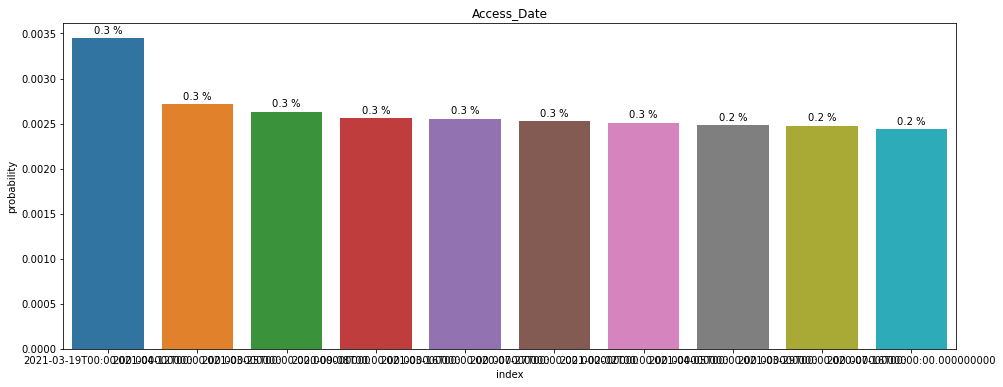

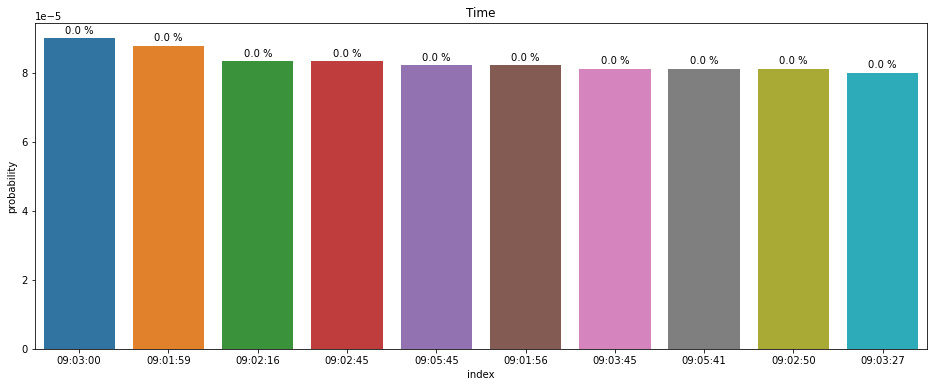

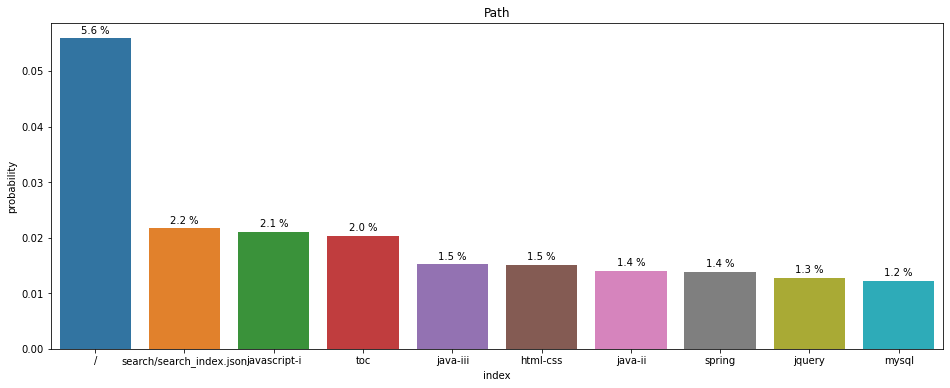

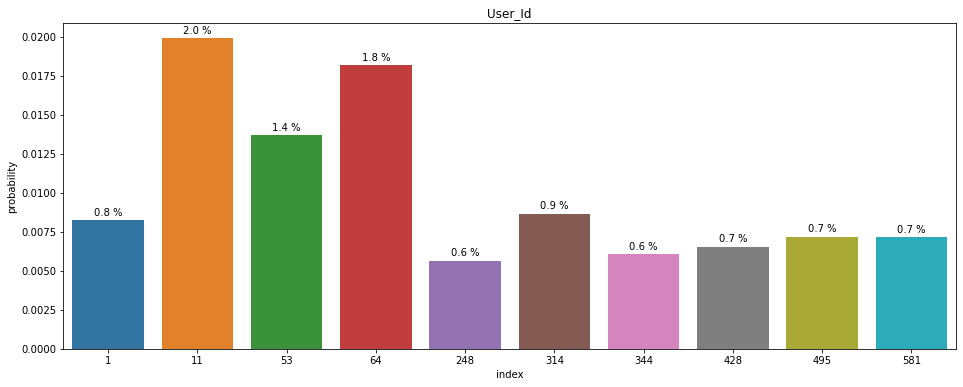

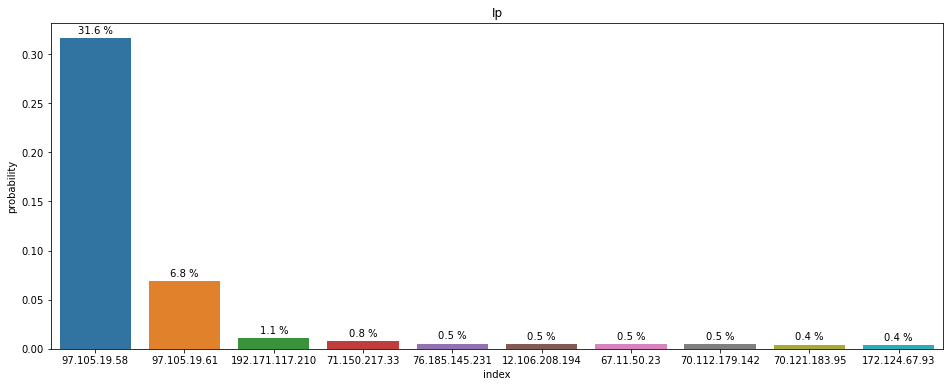

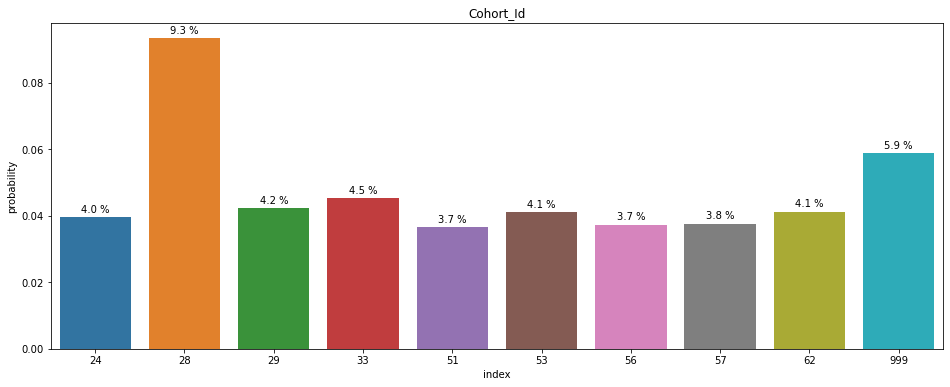

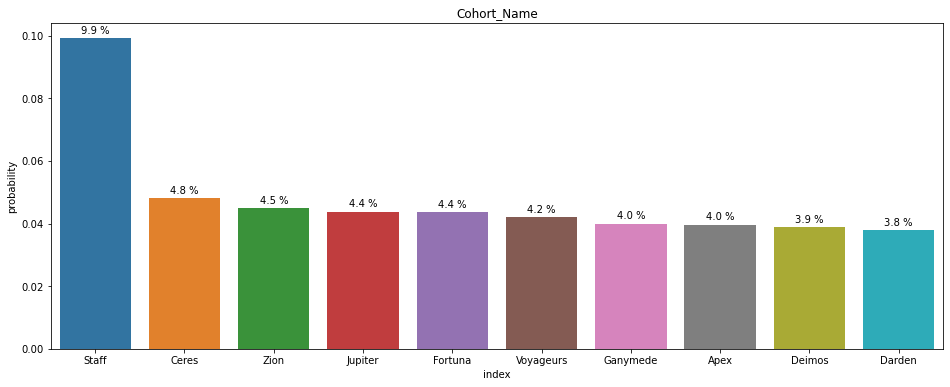

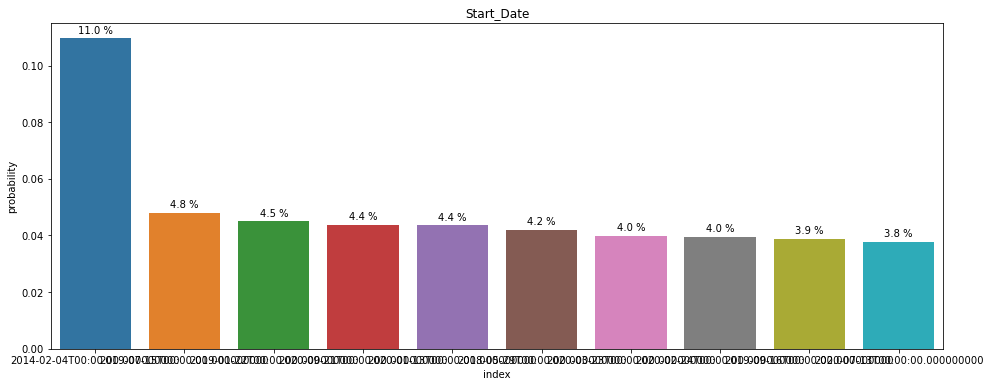

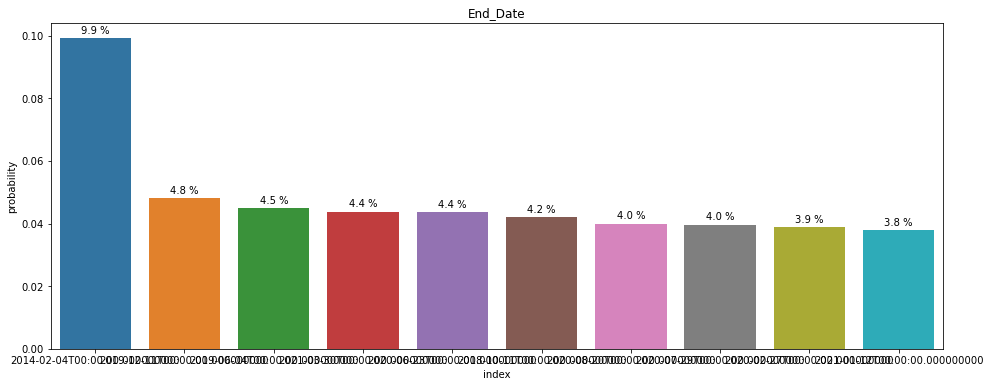

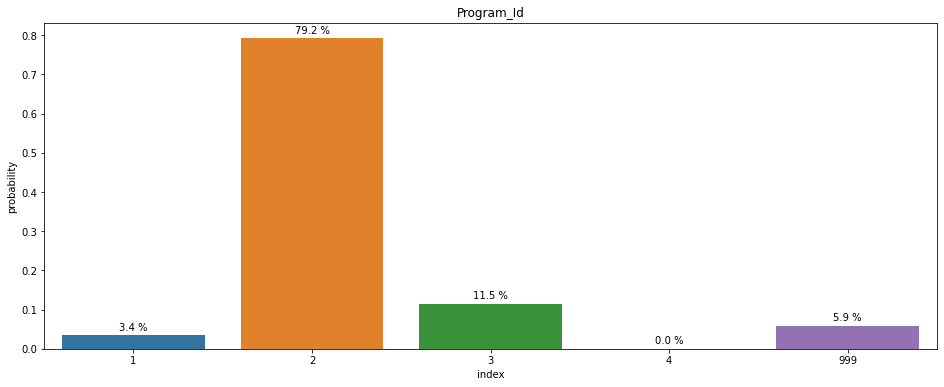

In [224]:
for col in df.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=df[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

In [225]:
#What stands out here:  3/19/21 had about a visible increase in views than ANY other day.
#Most access is around 9:00 am. This coincides with the class start time.
#User 11, 53, and 64 access the most. 53 is a staff member.
#Staff makes more views than cohorts

In [226]:
df.access_date == "2021-03-19"

0         False
1         False
2         False
3         False
4         False
          ...  
900218    False
900219    False
900220    False
900221    False
900222    False
Name: access_date, Length: 900223, dtype: bool

In [229]:
top_access_day = df.loc[df['access_date'] == '2021-03-19']
top_access_day

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
853770,2021-03-19,00:00:07,fundamentals/pipeline-demo,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853771,2021-03-19,00:01:57,fundamentals/vocabulary,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853772,2021-03-19,00:02:30,fundamentals/environment-setup,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853773,2021-03-19,00:05:00,javascript-i/introduction/working-with-data-ty...,927,136.50.58.119,138,Neptune,2021-03-15,2021-09-03,2
853774,2021-03-19,00:05:18,fundamentals/intro-to-data-science,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
...,...,...,...,...,...,...,...,...,...,...
856869,2021-03-19,22:57:10,fundamentals/DataToAction_v2.jpg,844,24.160.7.8,133,Easley,2020-12-07,2021-06-08,3
856870,2021-03-19,23:02:09,toc,878,98.156.147.200,135,Marco,2021-01-25,2021-07-19,2
856871,2021-03-19,23:02:19,html-css/css-ii/media-queries,878,98.156.147.200,135,Marco,2021-01-25,2021-07-19,2
856872,2021-03-19,23:02:28,examples/css/media-queries.html,878,98.156.147.200,135,Marco,2021-01-25,2021-07-19,2


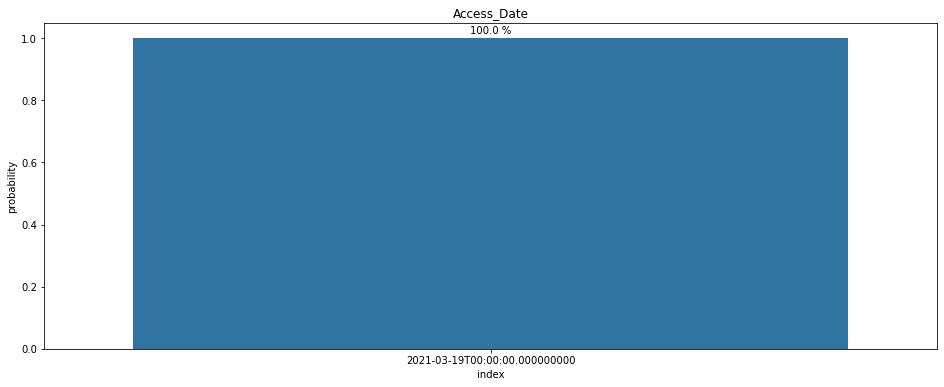

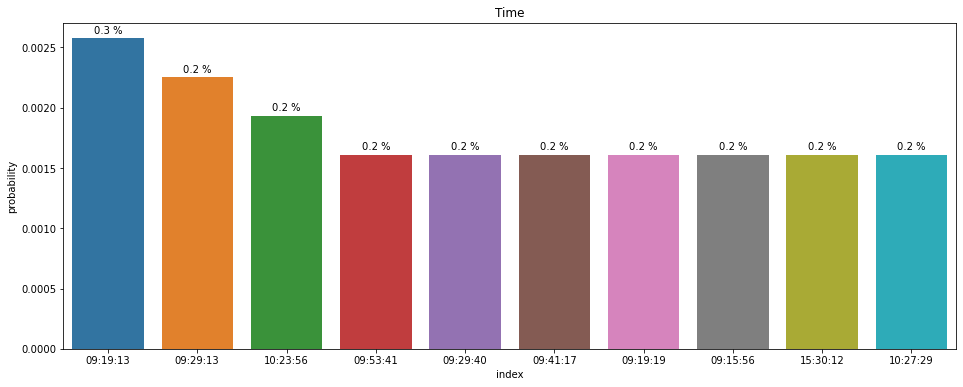

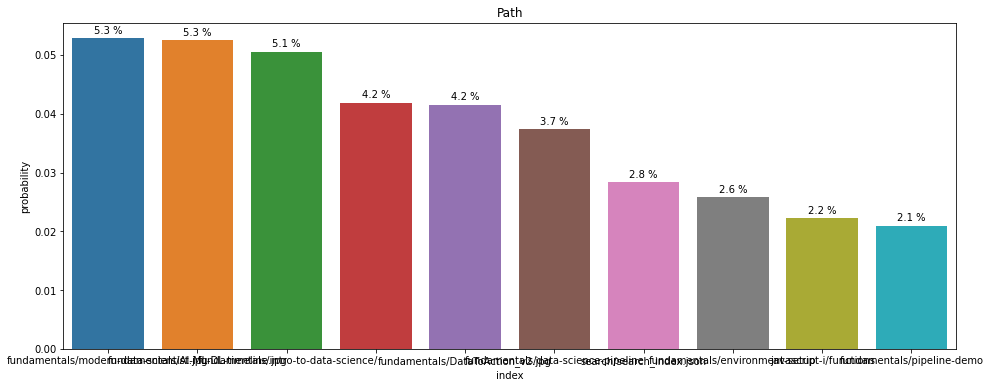

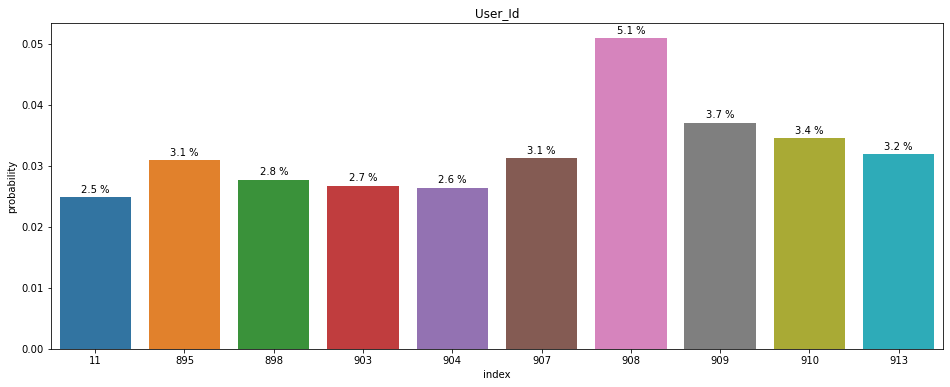

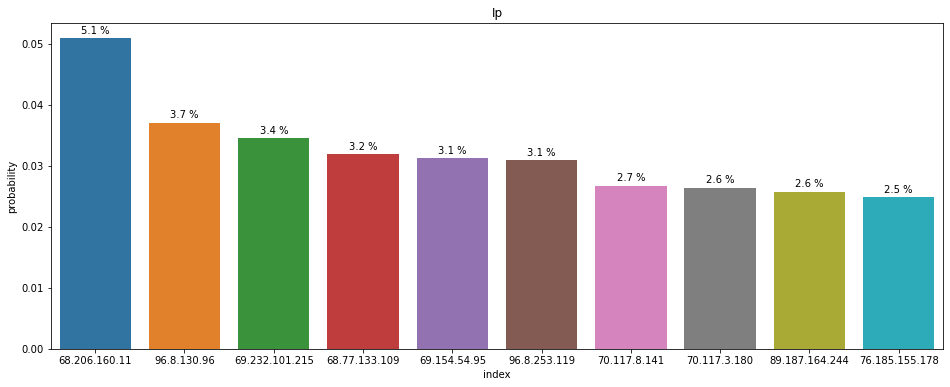

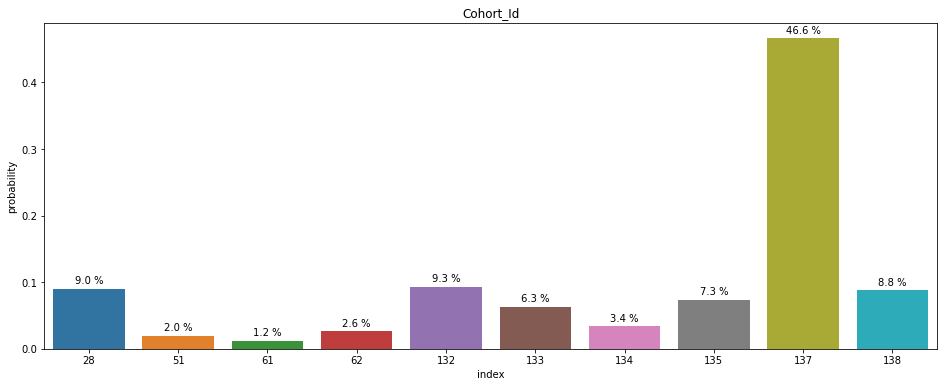

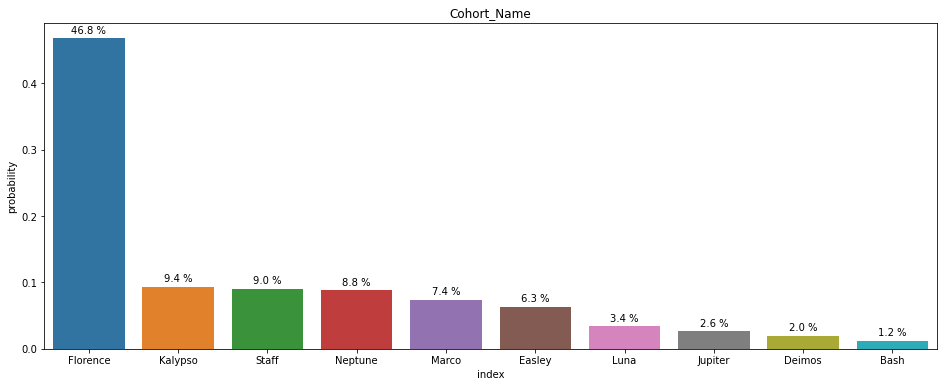

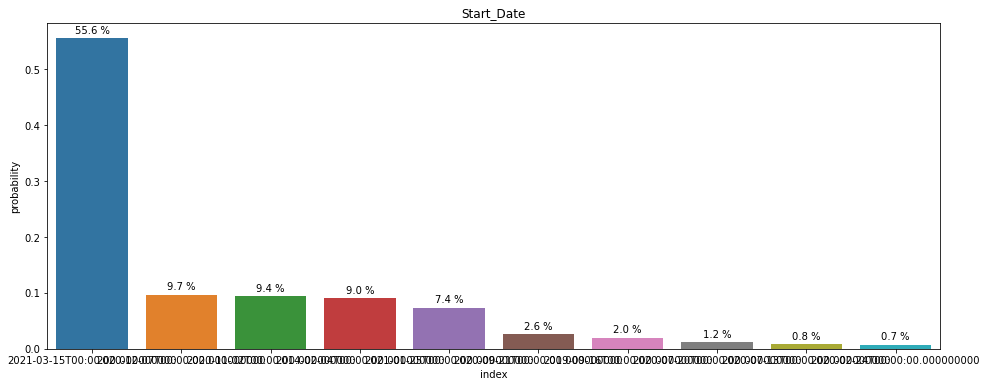

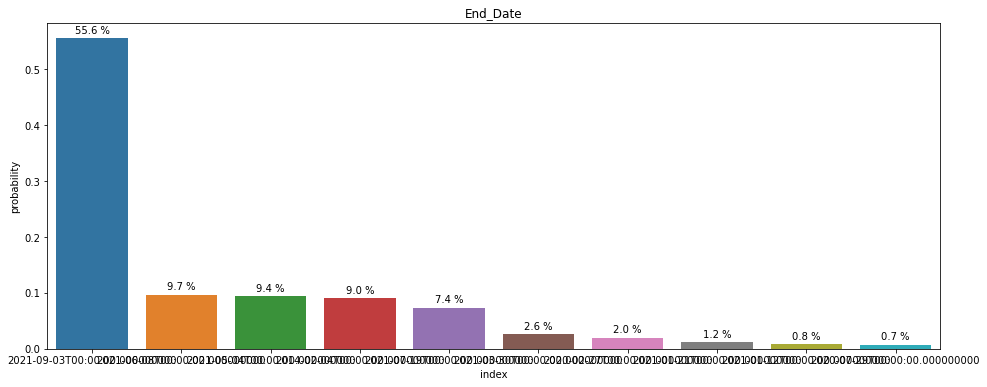

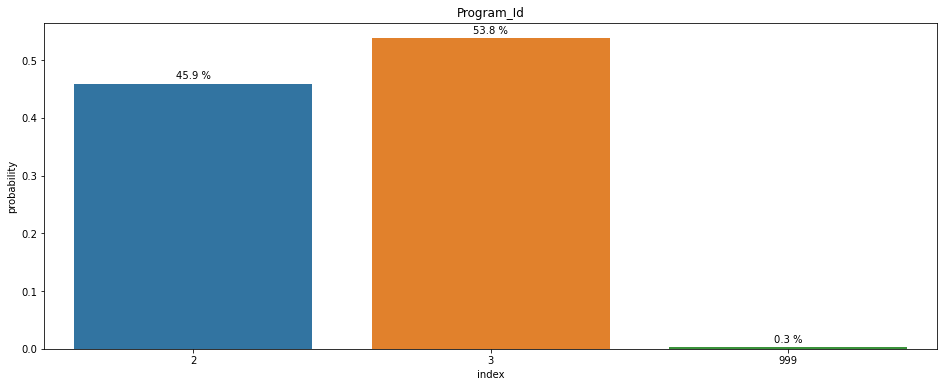

In [231]:
for col in top_access_day.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=top_access_day[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

In [232]:
#I want to look into: 15:30:12 time
#user id
#ip addresses

In [233]:
top_access_day.user_id.value_counts()

908    158
909    115
910    107
913     99
907     97
      ... 
485      1
827      1
864      1
744      1
917      1
Name: user_id, Length: 174, dtype: int64

In [234]:
top_access_day.ip.value_counts()

68.206.160.11     158
96.8.130.96       115
69.232.101.215    107
68.77.133.109      99
69.154.54.95       97
                 ... 
24.26.240.167       1
173.174.142.84      1
66.69.58.238        1
74.192.142.167      1
96.8.248.15         1
Name: ip, Length: 180, dtype: int64

In [238]:
top_access_day[top_access_day.user_id == 908].head(50)

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
853770,2021-03-19,00:00:07,fundamentals/pipeline-demo,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853771,2021-03-19,00:01:57,fundamentals/vocabulary,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853772,2021-03-19,00:02:30,fundamentals/environment-setup,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853774,2021-03-19,00:05:18,fundamentals/intro-to-data-science,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853775,2021-03-19,00:05:18,fundamentals/modern-data-scientist.jpg,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853776,2021-03-19,00:05:18,fundamentals/AI-ML-DL-timeline.jpg,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853781,2021-03-19,00:15:38,fundamentals/intro-to-data-science,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853782,2021-03-19,00:15:39,fundamentals/modern-data-scientist.jpg,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853783,2021-03-19,00:15:39,fundamentals/AI-ML-DL-timeline.jpg,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3
853785,2021-03-19,00:26:28,fundamentals/data-science-pipeline,908,68.206.160.11,137,Florence,2021-03-15,2021-09-03,3


In [239]:
#The above doesn't look suspicious. It looks like reading/reviewing/cramming before a lesson or test.

In [240]:
df[df.cohort_name == "Zion"]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
181754,2019-01-22,15:09:54,/,323,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181755,2019-01-22,15:10:01,toc,323,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181758,2019-01-22,15:11:47,/,324,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181759,2019-01-22,15:11:53,toc,323,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181760,2019-01-22,15:11:55,/,325,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
...,...,...,...,...,...,...,...,...,...,...
893521,2021-04-16,14:59:33,spring/fundamentals/form-model-binding,330,136.50.54.220,29,Zion,2019-01-22,2019-06-04,2
894514,2021-04-18,13:59:47,/,330,136.50.54.220,29,Zion,2019-01-22,2019-06-04,2
894515,2021-04-18,13:59:49,mysql,330,136.50.54.220,29,Zion,2019-01-22,2019-06-04,2
894516,2021-04-18,13:59:50,capstone,330,136.50.54.220,29,Zion,2019-01-22,2019-06-04,2


In [241]:
df[df.cohort_name == "Zion"].ip.value_counts()

97.105.19.58       24141
70.122.40.62        1338
66.69.108.117       1199
173.174.211.206     1019
72.181.110.80        607
                   ...  
174.207.2.32           1
99.203.91.141          1
99.203.155.123         1
99.203.155.176         1
174.207.15.199         1
Name: ip, Length: 236, dtype: int64

In [242]:
df[df.cohort_name == "Zion"].user_id.value_counts()

344    5460
323    2933
347    2318
325    2248
337    2183
330    2112
324    1876
334    1771
346    1609
341    1581
328    1533
333    1465
343    1266
329    1144
336    1113
339    1075
338    1019
335    1014
331     889
327     884
332     868
345     839
326     768
342     110
340      18
Name: user_id, dtype: int64

In [243]:
df[(df.cohort_name == "Zion") & (df.user_id == 344)]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
181849,2019-01-22,15:27:46,/,344,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181890,2019-01-22,15:30:05,toc,344,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181891,2019-01-22,15:30:09,html-css,344,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181892,2019-01-22,15:30:17,html-css/introduction,344,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
181916,2019-01-22,15:31:27,appendix,344,97.105.19.58,29,Zion,2019-01-22,2019-06-04,2
...,...,...,...,...,...,...,...,...,...,...
813598,2021-02-07,19:26:50,javascript-i/introduction/primitive-types,344,136.50.70.139,29,Zion,2019-01-22,2019-06-04,2
815138,2021-02-08,19:09:12,java-i/methods,344,136.50.70.139,29,Zion,2019-01-22,2019-06-04,2
822508,2021-02-16,20:23:47,/,344,136.50.70.139,29,Zion,2019-01-22,2019-06-04,2
822509,2021-02-16,20:23:51,toc,344,136.50.70.139,29,Zion,2019-01-22,2019-06-04,2


In [246]:
df[(df.cohort_name == "Zion") & (df.user_id == 344)].path.value_counts().head(50)

javascript-i                                                                 272
/                                                                            181
java-iii                                                                     181
javascript-ii                                                                176
java-i                                                                       157
java-ii                                                                      149
html-css                                                                     147
jquery                                                                       140
mysql                                                                        139
spring                                                                       106
javascript-i/functions                                                        76
javascript-ii/ajax-api                                                        73
html-css/css-i/selectors-and

In [245]:
df[(df.cohort_name == "Zion") & (df.user_id == 344)].access_date.value_counts()

2019-04-28    134
2019-03-20    117
2019-09-15    108
2019-04-16    103
2019-04-08    103
             ... 
2019-10-20      1
2021-04-12      1
2019-10-17      1
2019-11-20      1
2019-10-18      1
Name: access_date, Length: 204, dtype: int64

In [248]:
df[df.cohort_name == "Zion"].access_date.value_counts().head(50)

2019-02-06    853
2019-03-20    755
2019-04-10    683
2019-04-11    597
2019-04-08    591
2019-03-04    579
2019-03-07    572
2019-03-11    560
2019-02-27    536
2019-04-16    534
2019-04-09    518
2019-04-15    507
2019-03-05    503
2019-02-14    496
2019-01-28    495
2019-04-12    495
2019-02-20    490
2019-02-05    490
2019-03-18    488
2019-04-23    480
2019-05-07    472
2019-03-03    439
2019-02-28    436
2019-02-19    410
2019-01-30    402
2019-03-14    400
2019-04-22    397
2019-01-25    390
2019-04-04    383
2019-04-02    382
2019-03-25    373
2019-04-03    372
2019-02-25    370
2019-03-08    364
2019-03-21    363
2019-01-23    361
2019-03-12    355
2019-03-19    345
2019-05-08    342
2019-04-05    340
2019-03-22    332
2019-02-01    326
2019-05-09    326
2019-03-28    324
2019-05-06    315
2019-01-31    313
2019-05-01    309
2019-04-24    304
2019-02-07    302
2019-01-24    298
Name: access_date, dtype: int64

In [249]:
df[(df.cohort_name == "Zion") & (df.access_date == "2019-02-06")].time.value_counts()

11:03:51    2
10:51:50    2
09:29:10    2
09:29:06    2
09:23:11    2
           ..
13:41:33    1
20:48:27    1
22:26:04    1
12:37:11    1
11:53:47    1
Name: time, Length: 834, dtype: int64

In [250]:
df[df.cohort_name == "Zion"].time.value_counts()

22:52:09    30
22:52:07    30
22:52:11    27
22:52:10    25
22:52:08    25
            ..
14:29:18     1
17:17:48     1
08:34:56     1
13:06:22     1
11:47:37     1
Name: time, Length: 25990, dtype: int64

<AxesSubplot:xlabel='time'>

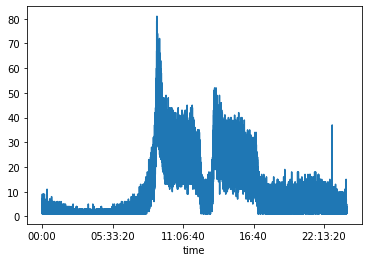

In [260]:
df.time.value_counts().plot()

<AxesSubplot:xlabel='time'>

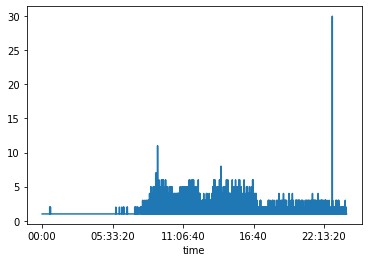

In [261]:
df[df.cohort_name == "Zion"].time.value_counts().plot()

In [262]:
#These two charts coincide. Something odd is happening here.

In [263]:
df[df.cohort_name == "Zion"].time.value_counts().head(50)

22:52:09    30
22:52:07    30
22:52:11    27
22:52:10    25
22:52:08    25
22:52:06    21
22:52:12    12
09:05:50    11
14:05:59     8
09:02:19     7
08:59:19     7
09:02:16     7
08:57:03     7
09:04:22     6
09:00:18     6
09:33:48     6
09:24:17     6
13:36:34     6
09:12:03     6
11:38:18     6
09:01:56     6
13:58:36     6
14:59:06     6
09:00:27     6
16:37:05     6
09:26:22     6
11:49:23     6
14:01:10     6
11:35:37     6
09:43:47     6
09:05:06     6
09:00:41     6
14:31:24     6
16:35:20     6
13:34:57     6
09:04:50     6
15:30:29     6
12:18:24     6
15:54:54     6
09:01:53     6
09:07:58     6
09:28:02     6
11:49:47     6
15:33:52     6
08:58:52     6
15:14:31     6
11:56:03     6
09:01:55     6
09:00:20     6
08:59:15     6
Name: time, dtype: int64

In [273]:
#22:52:09    30
#22:52:07    30
#22:52:11    27
#22:52:10    25
#22:52:08    25
#22:52:06    21
#22:52:12    12

df[df.cohort_name == "Zion"].ip.value_counts()

97.105.19.58       24141
70.122.40.62        1338
66.69.108.117       1199
173.174.211.206     1019
72.181.110.80        607
                   ...  
174.207.2.32           1
99.203.91.141          1
99.203.155.123         1
99.203.155.176         1
174.207.15.199         1
Name: ip, Length: 236, dtype: int64

In [278]:
df[(df.cohort_name == 'Zion') & (df.ip == '70.122.40.62')].path.value_counts()

java-i                                    68
java-iii                                  64
java-ii                                   63
/                                         61
javascript-i                              53
                                          ..
2-stats/2.2-navigating-excel               1
jquery/events                              1
appendix/git/merge-conflict-demo           1
appendix/git/branching                     1
appendix/further-reading/spring/seeder     1
Name: path, Length: 140, dtype: int64

In [279]:
df[(df.cohort_name == 'Zion') & (df.ip == '70.122.40.62')].time.value_counts()

21:48:43    3
14:21:02    2
20:40:07    2
21:26:55    2
14:41:59    2
           ..
22:23:33    1
21:03:16    1
20:49:08    1
22:25:03    1
18:06:08    1
Name: time, Length: 1312, dtype: int64

In [280]:
df[(df.cohort_name == 'Zion') & (df.ip == '97.105.19.58')].path.value_counts()

/                           951
toc                         906
javascript-i                494
java-iii                    463
search/search_index.json    460
                           ... 
jquery/traversing             1
132                           1
student/202                   1
3.6-functions                 1
131                           1
Name: path, Length: 244, dtype: int64

In [281]:
df[(df.cohort_name == 'Zion') & (df.ip == '97.105.19.58')].time.value_counts()

09:05:50    10
14:05:59     8
09:02:16     7
08:57:03     7
08:59:19     7
            ..
11:42:56     1
09:47:38     1
12:35:56     1
12:29:01     1
15:30:24     1
Name: time, Length: 16175, dtype: int64

In [282]:
df[(df.cohort_name == 'Zion') & (df.ip == '66.69.108.117')].path.value_counts()

javascript-i/bom-and-dom/bom           36
toc                                    29
javascript-i/bom-and-dom/dom-events    27
jquery                                 26
javascript-i/bom-and-dom/dom           25
                                       ..
spring/extra-features/file-upload       1
appendix/git/merge-conflict-demo        1
appendix/code-standards/mysql           1
appendix/git/working-in-teams           1
appendix/git/intellij-intro             1
Name: path, Length: 151, dtype: int64

In [283]:
df[(df.cohort_name == 'Zion') & (df.ip == '66.69.108.117')].time.value_counts()

19:25:54    3
20:32:21    2
10:43:10    2
12:03:55    2
20:37:38    2
           ..
20:42:46    1
15:10:57    1
20:52:58    1
21:01:56    1
19:30:28    1
Name: time, Length: 1162, dtype: int64

In [284]:
df[(df.cohort_name == 'Zion') & (df.time == '22:52:09')]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id


In [296]:
df[(df.cohort_name == 'Zion')].ip.value_counts().head(50)

97.105.19.58       24141
70.122.40.62        1338
66.69.108.117       1199
173.174.211.206     1019
72.181.110.80        607
107.204.50.40        562
192.171.117.210      491
130.45.43.174        467
67.11.130.89         464
172.124.70.146       462
76.185.211.152       429
167.24.104.150       407
24.28.148.245        342
24.242.60.149        309
72.181.99.44         308
170.248.173.247      277
99.98.32.165         267
76.185.172.182       251
99.43.108.160        237
173.174.243.231      233
170.248.173.245      205
66.90.180.216        194
72.190.162.161       181
204.44.112.76        180
136.50.54.220        172
67.11.28.235         168
104.56.10.184        147
96.8.128.88          146
136.50.59.188        139
67.11.204.68         125
170.248.173.246      121
12.5.63.226          109
108.93.9.152         104
50.30.92.17           94
173.173.102.182       94
70.125.137.193        89
72.179.108.103        87
70.125.140.30         78
173.173.98.244        76
72.190.170.159        74


In [298]:
df[(df.cohort_name == 'Zion')].access_date.value_counts().head(50)

2019-02-06    853
2019-03-20    755
2019-04-10    683
2019-04-11    597
2019-04-08    591
2019-03-04    579
2019-03-07    572
2019-03-11    560
2019-02-27    536
2019-04-16    534
2019-04-09    518
2019-04-15    507
2019-03-05    503
2019-02-14    496
2019-01-28    495
2019-04-12    495
2019-02-20    490
2019-02-05    490
2019-03-18    488
2019-04-23    480
2019-05-07    472
2019-03-03    439
2019-02-28    436
2019-02-19    410
2019-01-30    402
2019-03-14    400
2019-04-22    397
2019-01-25    390
2019-04-04    383
2019-04-02    382
2019-03-25    373
2019-04-03    372
2019-02-25    370
2019-03-08    364
2019-03-21    363
2019-01-23    361
2019-03-12    355
2019-03-19    345
2019-05-08    342
2019-04-05    340
2019-03-22    332
2019-02-01    326
2019-05-09    326
2019-03-28    324
2019-05-06    315
2019-01-31    313
2019-05-01    309
2019-04-24    304
2019-02-07    302
2019-01-24    298
Name: access_date, dtype: int64

In [324]:
df[df.cohort_name == 'Zion'][4350:4400]

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
191852,2019-02-05,20:15:51,jquery,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191853,2019-02-05,20:15:57,javascript-i/coffee-project,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191854,2019-02-05,20:16:06,javascript-i/introduction,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191855,2019-02-05,20:16:12,javascript-i/introduction/primitive-types,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191856,2019-02-05,20:16:20,javascript-i/introduction/variables,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191857,2019-02-05,20:16:41,javascript-i/introduction/operators,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191858,2019-02-05,20:18:21,javascript-i/introduction/variables,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191860,2019-02-05,20:31:08,javascript-i/introduction/working-with-data-ty...,347,66.69.108.117,29,Zion,2019-01-22,2019-06-04,2
191861,2019-02-05,21:02:14,javascript-i,344,173.174.211.206,29,Zion,2019-01-22,2019-06-04,2
191862,2019-02-05,21:02:21,javascript-i/introduction/primitive-types,344,173.174.211.206,29,Zion,2019-01-22,2019-06-04,2


In [332]:
time_given_ip = (
    df[df.cohort_name == "Zion"].groupby('ip')
    .time.value_counts(normalize=True)
    .rename('proba_time_given_ip')
    .reset_index()
)
time_given_ip

,ip,time,proba_time_given_ip
0,104.184.230.44,19:31:15,0.250000
1,104.184.230.44,15:17:51,0.125000
2,104.184.230.44,15:19:04,0.125000
3,104.184.230.44,15:19:13,0.125000
4,104.184.230.44,19:15:00,0.125000
...,...,...,...
29772,99.98.32.165,23:55:08,0.003745
29773,99.98.32.165,23:55:22,0.003745
29774,99.98.32.165,23:55:23,0.003745
29775,99.98.32.165,23:55:26,0.003745


Upon looking further, I cannot find what is suspicious. I would need to do more digging.

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
****
#Check out end date for cohorts. Then look at what they are viewing.

In [335]:
df.head()

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2


In [339]:
df[df.program_id == 2].cohort_name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Wrangell      25586
Andromeda     25359
Kalypso       23691
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Sequoia        7444
Neptune        7276
Pinnacles      2158
Oberon         1672
Niagara         755
Mammoth         691
Name: cohort_name, dtype: int64

In [342]:
ceres_df = df[df.cohort_name == "Ceres"]
ceres_df

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
299087,2019-07-15,15:39:34,/,433,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299088,2019-07-15,15:39:48,toc,433,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299089,2019-07-15,15:40:29,quiz,434,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299090,2019-07-15,15:40:33,/,434,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
299091,2019-07-15,15:40:35,javascript-i,433,97.105.19.58,33,Ceres,2019-07-15,2019-12-11,2
...,...,...,...,...,...,...,...,...,...,...
874957,2021-04-04,20:12:54,java-i/introduction-to-java,434,76.198.205.14,33,Ceres,2019-07-15,2019-12-11,2
893207,2021-04-16,13:07:48,/,437,76.185.173.254,33,Ceres,2019-07-15,2019-12-11,2
893208,2021-04-16,13:07:51,javascript-ii,437,76.185.173.254,33,Ceres,2019-07-15,2019-12-11,2
893209,2021-04-16,13:07:51,javascript-i,437,76.185.173.254,33,Ceres,2019-07-15,2019-12-11,2


In [347]:
#start_date = "2019-07-15"
#end_date = "2019-12-11"

before_start_date = df["access_date"] <= df["start_date"]
after_end_date = df["access_date"] >= df["end_date"]
outside_two_dates = before_start_date & after_end_date
filtered_dates = df.loc[after_end_date]

In [348]:
filtered_dates

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
30,2018-01-26,10:14:47,/,11,97.105.19.61,1,Arches,2014-02-04,2014-04-22,1
...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33,28,Staff,2014-02-04,2014-02-04,2
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33,28,Staff,2014-02-04,2014-02-04,2
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33,28,Staff,2014-02-04,2014-02-04,2
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,24.160.137.86,28,Staff,2014-02-04,2014-02-04,2


In [354]:
post_prog_1 = filtered_dates[(filtered_dates.program_id == 1) & (filtered_dates.cohort_id != 28)]
post_prog_2 = filtered_dates[(filtered_dates.program_id == 2) & (filtered_dates.cohort_id != 28)]
post_prog_3 = filtered_dates[(filtered_dates.program_id == 3) & (filtered_dates.cohort_id != 28)]
post_prog_4 = filtered_dates[(filtered_dates.program_id == 4) & (filtered_dates.cohort_id != 28)]

In [353]:
post_prog_1

,access_date,time,path,user_id,ip,cohort_id,cohort_name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
30,2018-01-26,10:14:47,/,11,97.105.19.61,1,Arches,2014-02-04,2014-04-22,1
...,...,...,...,...,...,...,...,...,...,...
883786,2021-04-10,00:20:55,content/javascript/conditionals.html,51,72.179.168.148,13,Kings,2016-05-23,2016-09-15,1
883787,2021-04-10,00:21:15,content/javascript/loops.html,51,72.179.168.148,13,Kings,2016-05-23,2016-09-15,1
883788,2021-04-10,00:28:10,content/javascript/javascript-with-html.html,80,136.50.29.193,14,Lassen,2016-07-18,2016-11-10,1
883789,2021-04-10,00:28:11,content/javascript/conditionals.html,80,136.50.29.193,14,Lassen,2016-07-18,2016-11-10,1


In [357]:
post_prog_1.path.value_counts().head(50)

/                                                                            1681
index.html                                                                   1011
javascript-i                                                                  736
html-css                                                                      542
spring                                                                        501
java-iii                                                                      479
java-ii                                                                       454
java-i                                                                        444
javascript-ii                                                                 429
appendix                                                                      409
jquery                                                                        344
mysql                                                                         284
content/html-css

In [358]:
post_prog_2.path.value_counts().head(50)

/                                              6100
javascript-i                                   2416
spring                                         2368
search/search_index.json                       2222
html-css                                       1861
java-i                                         1831
java-ii                                        1730
java-iii                                       1669
javascript-ii                                  1559
toc                                            1511
mysql                                          1405
appendix                                       1389
jquery                                         1208
spring/fundamentals/controllers                1103
spring/setup                                   1075
spring/fundamentals/views                       941
spring/fundamentals/repositories                856
html-css/elements                               736
java-i/introduction-to-java                     698
java-i/synta

In [359]:
post_prog_3.path.value_counts().head(50)

/                                                                1446
search/search_index.json                                          493
sql/mysql-overview                                                275
classification/overview                                           267
classification/scale_features_or_not.svg                          220
anomaly-detection/AnomalyDetectionCartoon.jpeg                    193
anomaly-detection/overview                                        191
fundamentals/AI-ML-DL-timeline.jpg                                189
fundamentals/modern-data-scientist.jpg                            187
fundamentals/intro-to-data-science                                184
1-fundamentals/modern-data-scientist.jpg                          128
1-fundamentals/1.1-intro-to-data-science                          127
1-fundamentals/AI-ML-DL-timeline.jpg                              127
sql/database-design                                                87
6-regression/1-overv

In [360]:
post_prog_4.path.value_counts().head(50)

content/html-css                               2
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
/                                              1
Name: path, dtype: int64

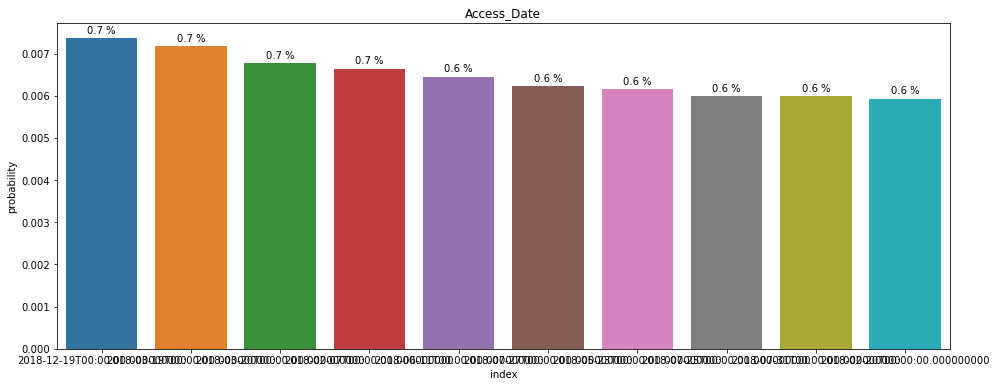

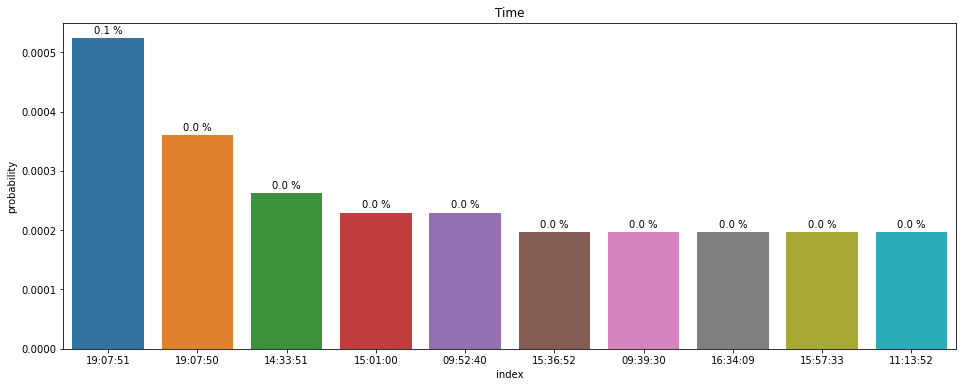

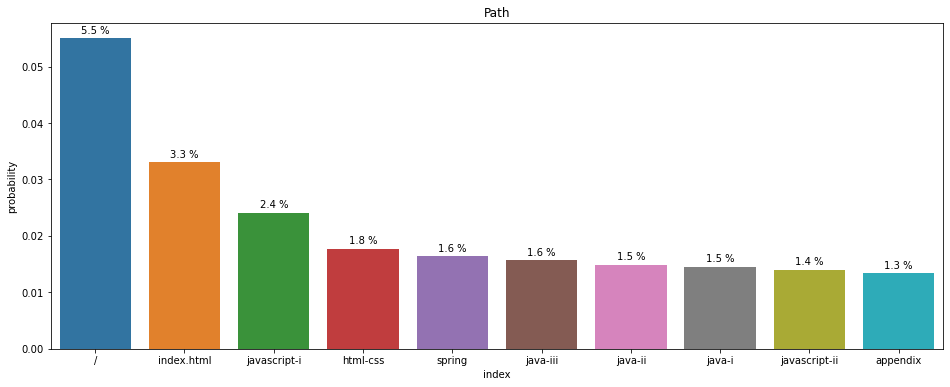

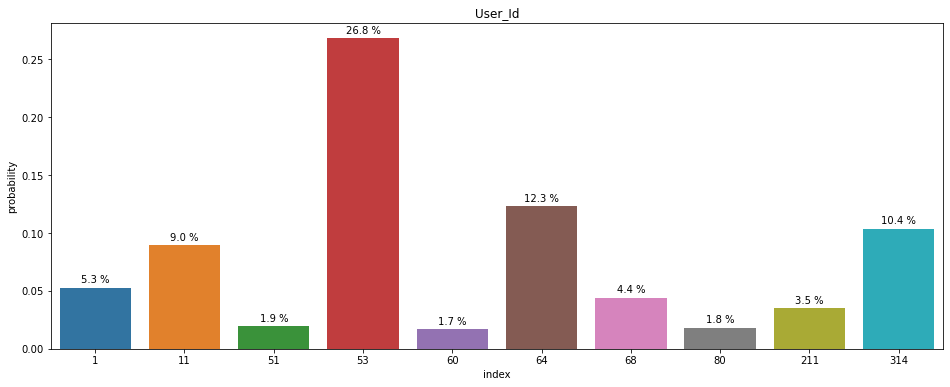

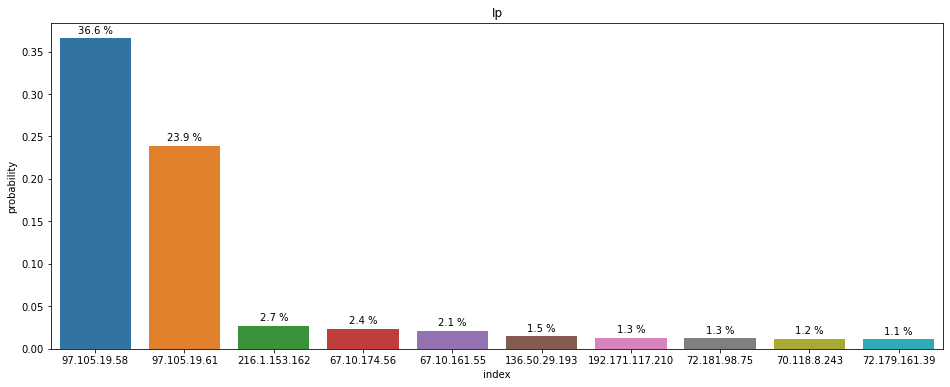

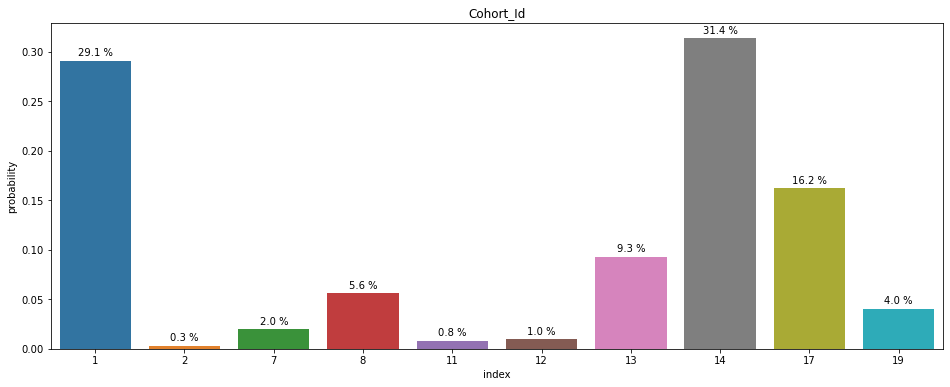

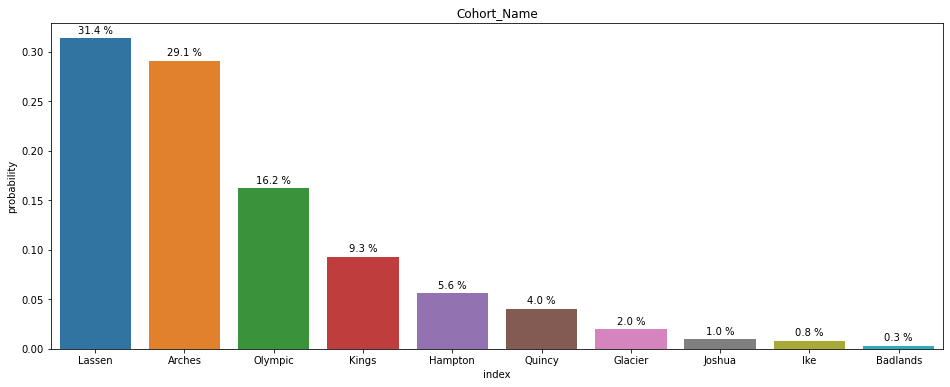

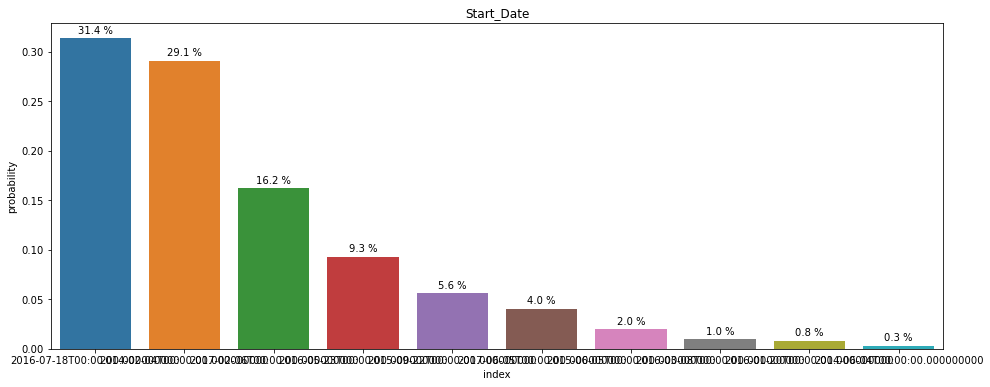

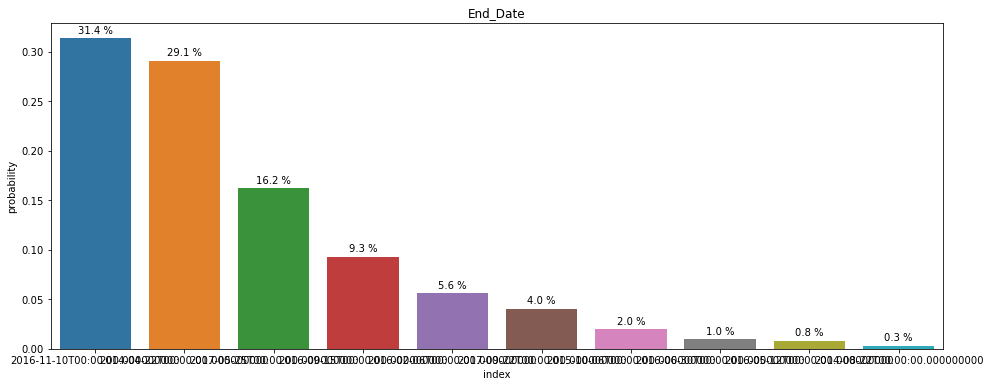

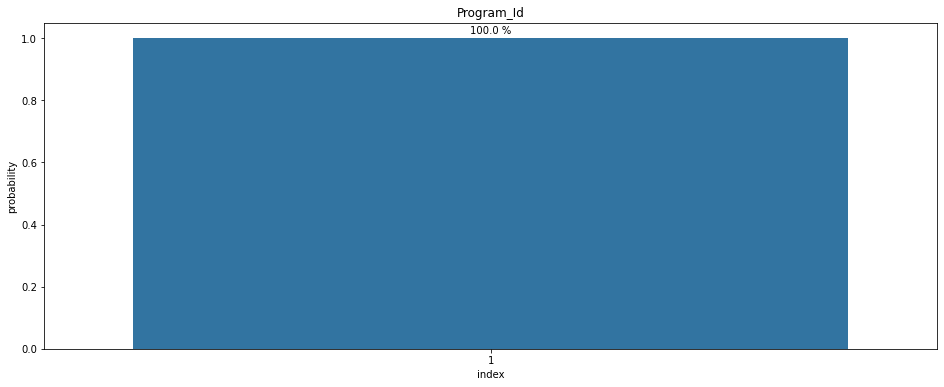

In [361]:
for col in post_prog_1.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=post_prog_1[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

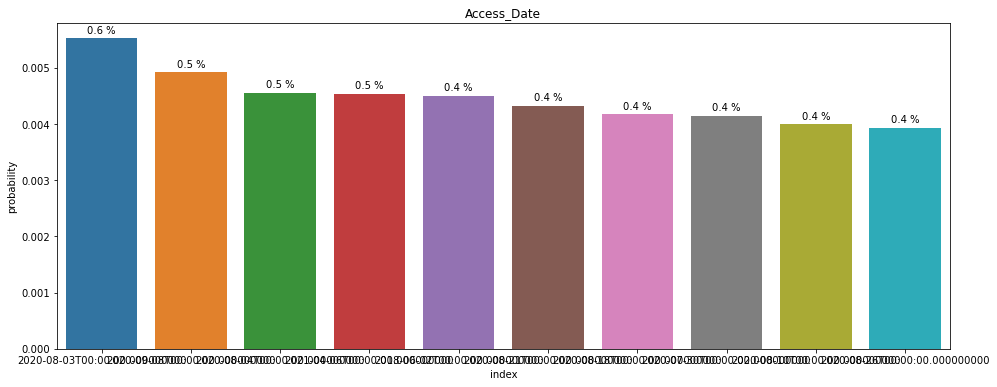

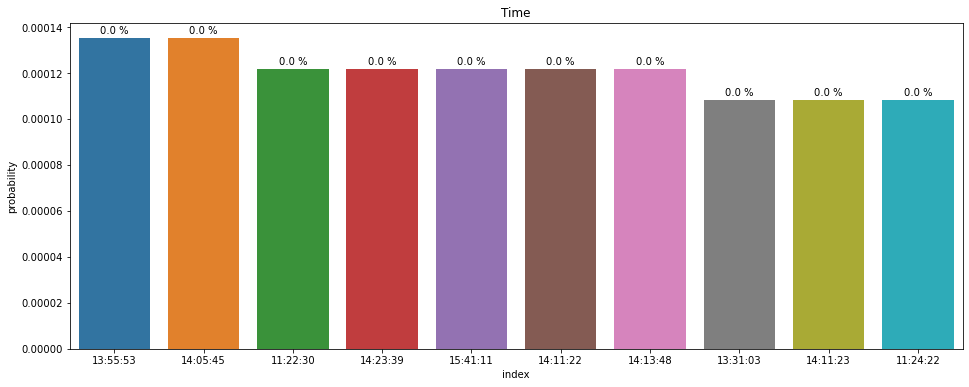

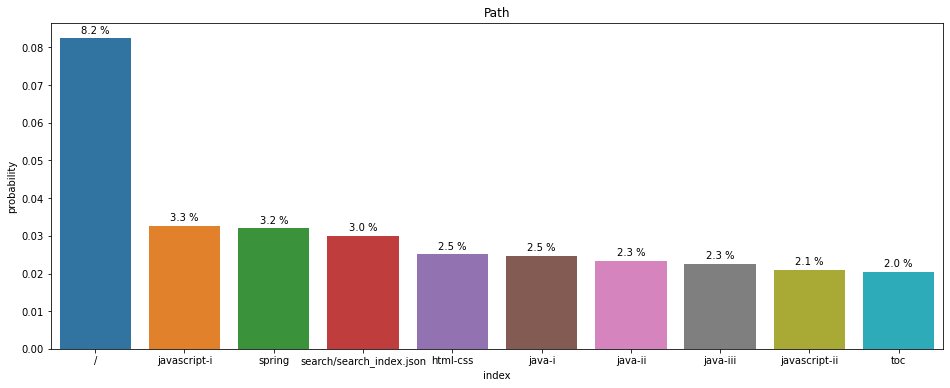

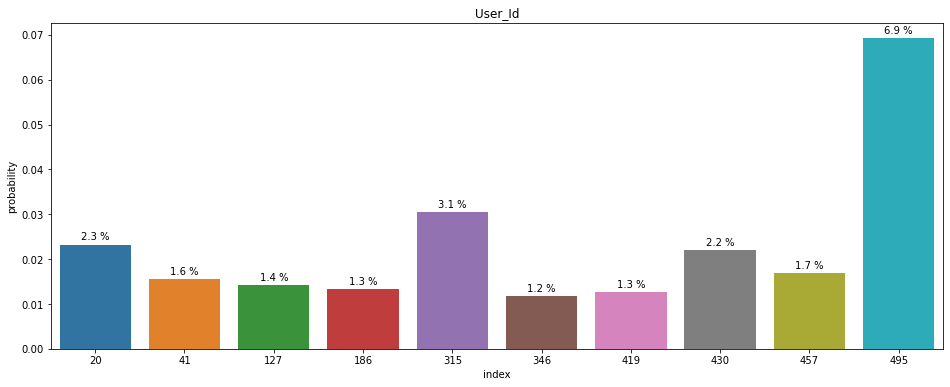

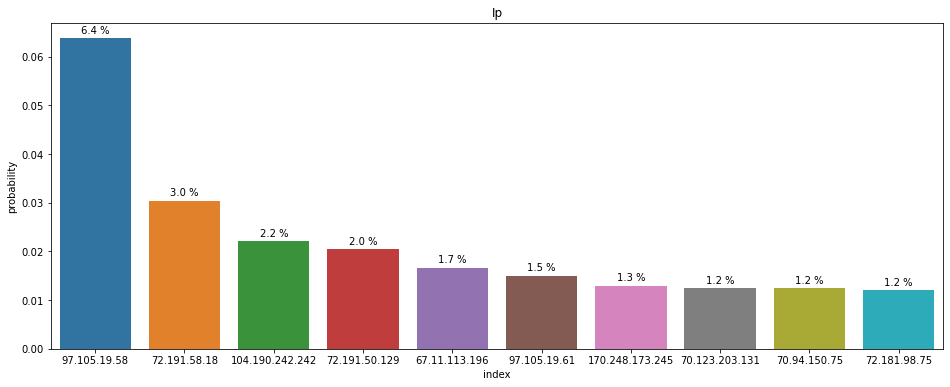

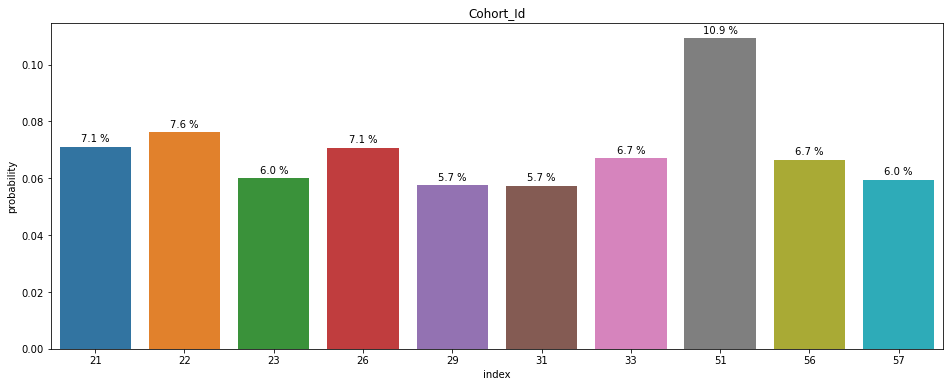

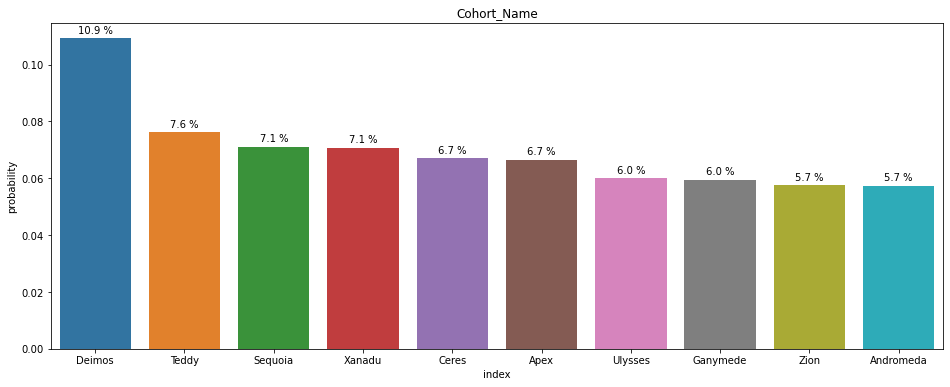

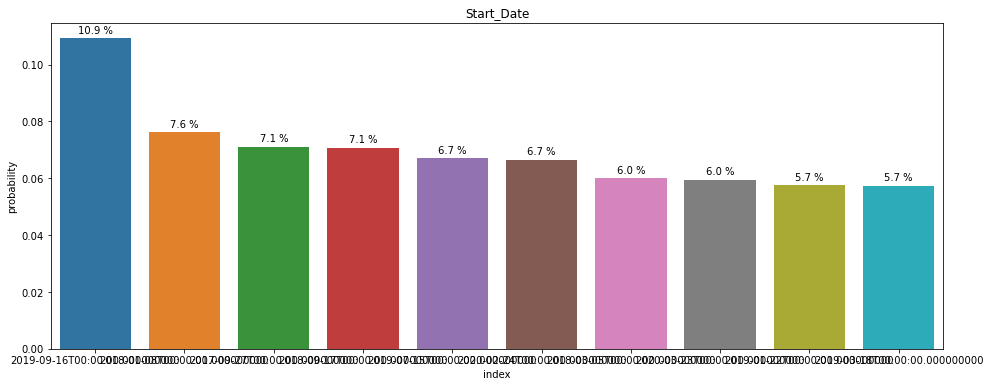

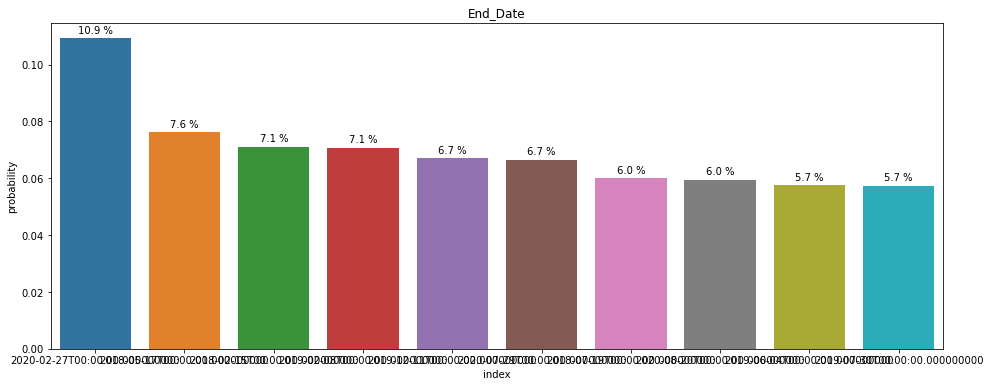

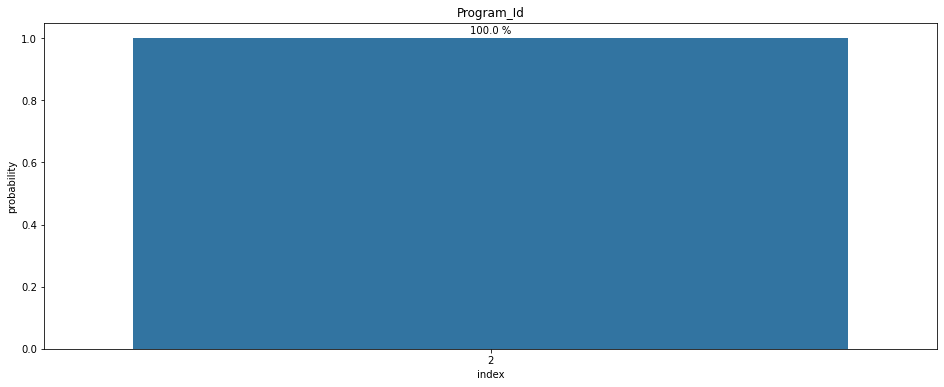

In [362]:
for col in post_prog_2.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=post_prog_2[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

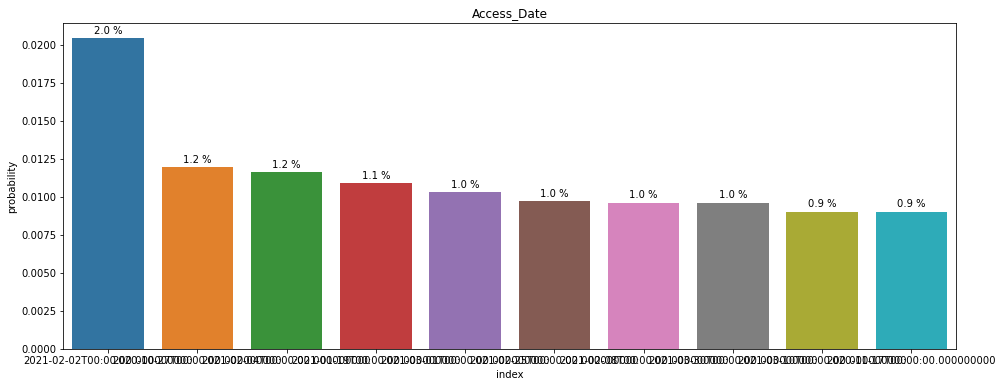

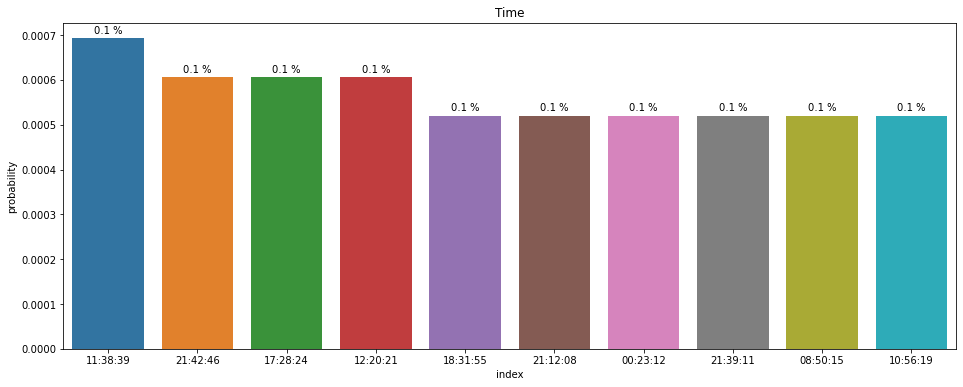

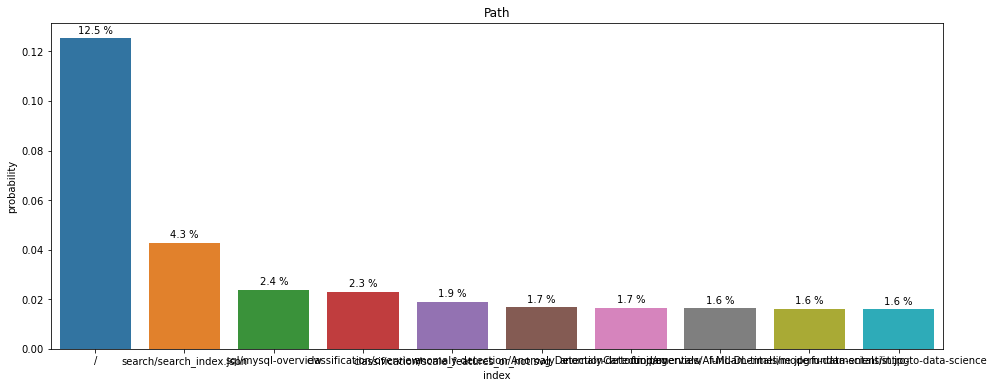

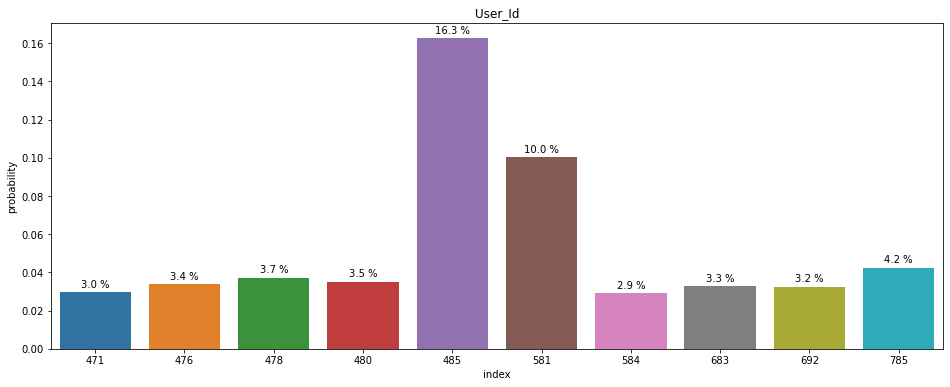

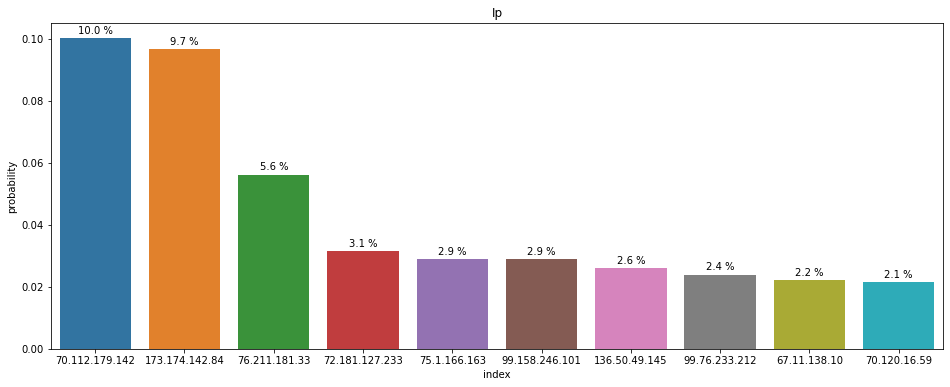

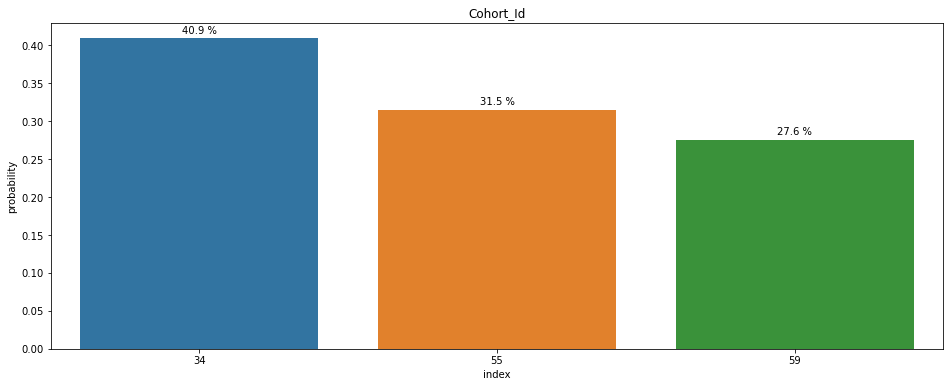

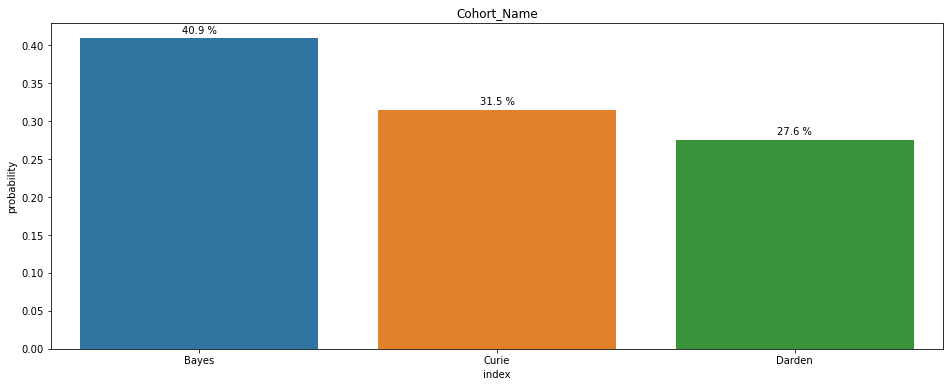

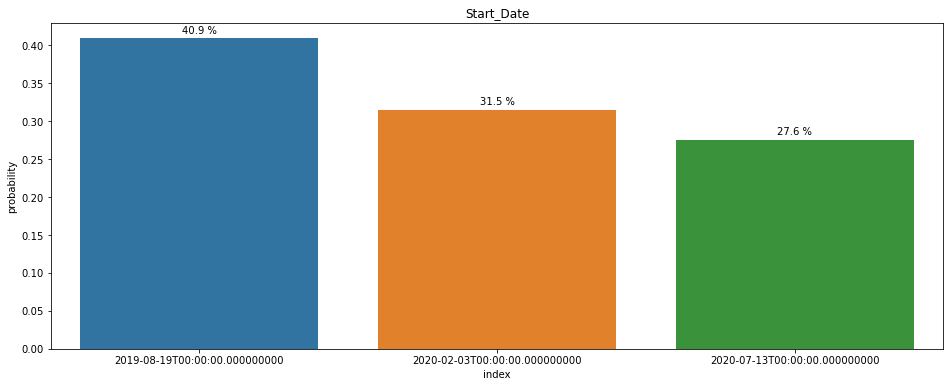

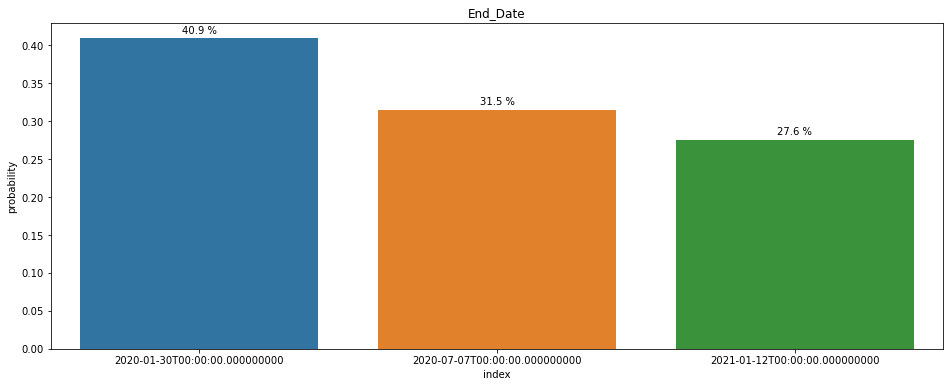

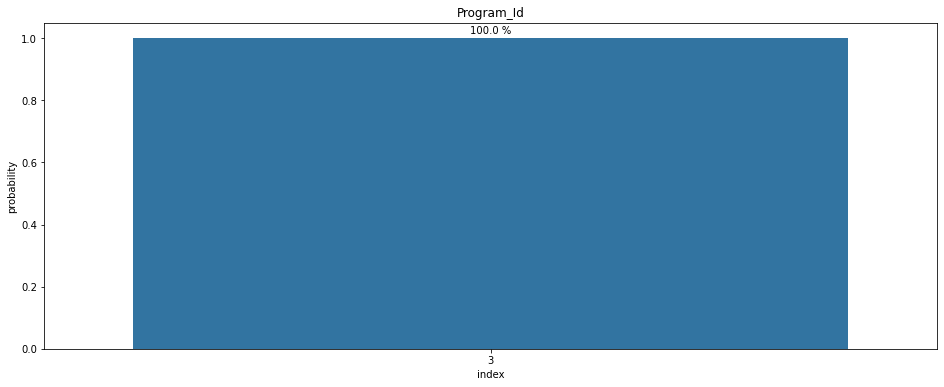

In [363]:
for col in post_prog_3.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=post_prog_3[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

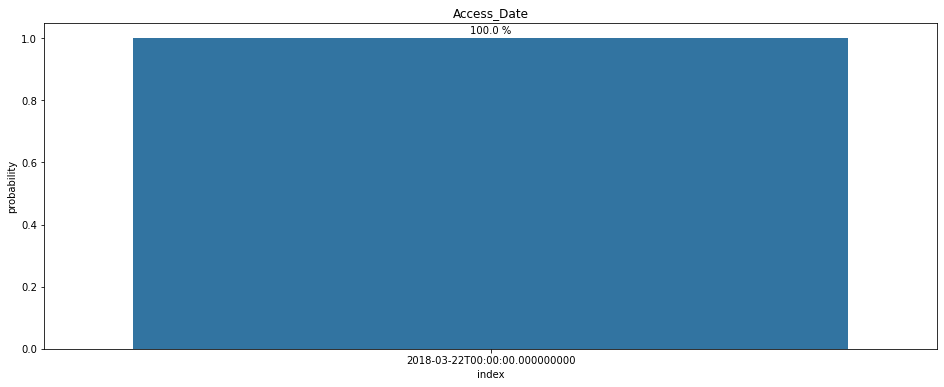

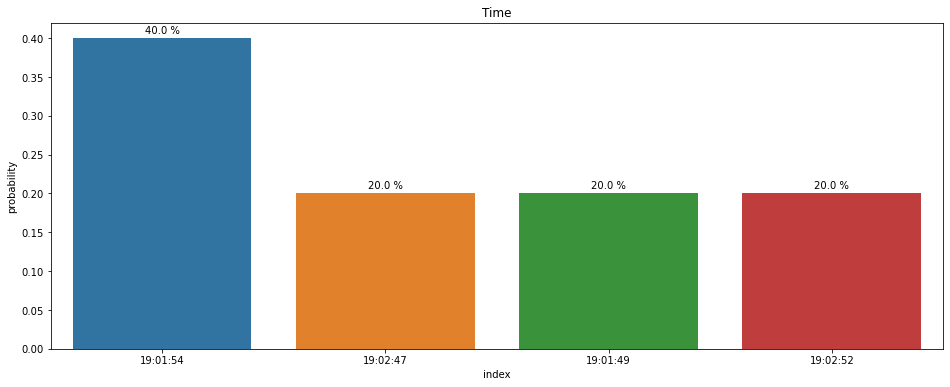

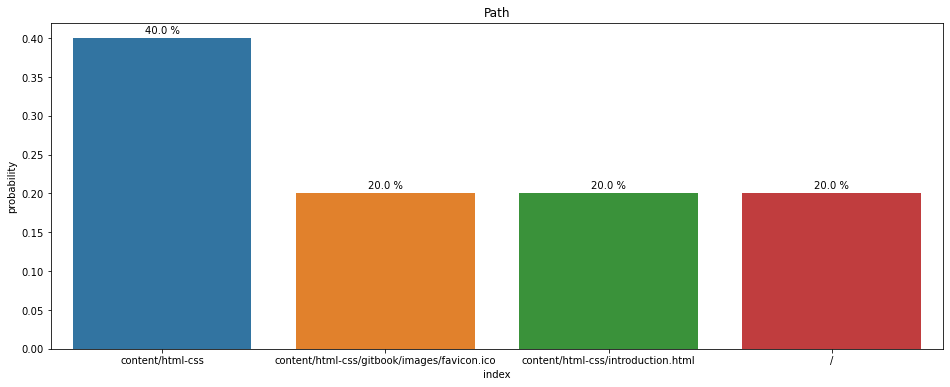

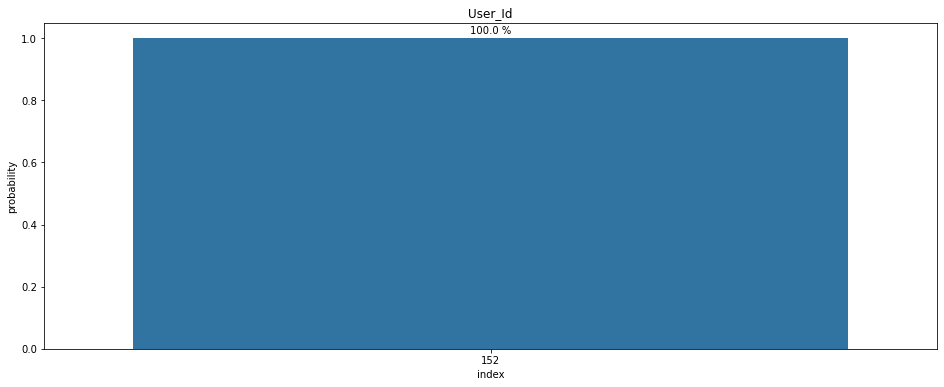

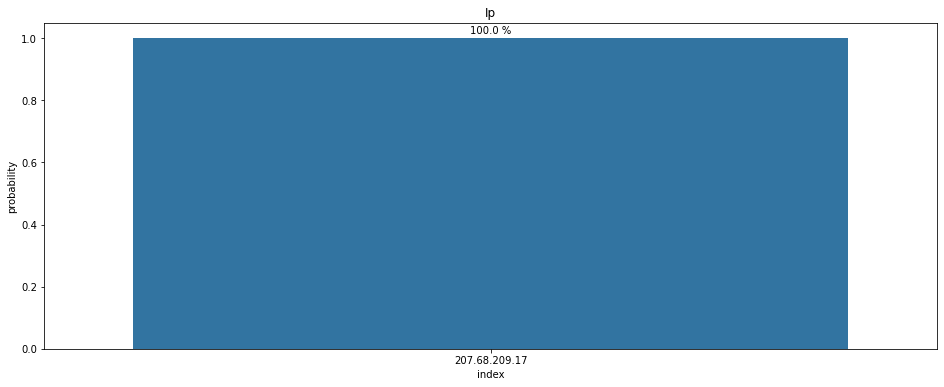

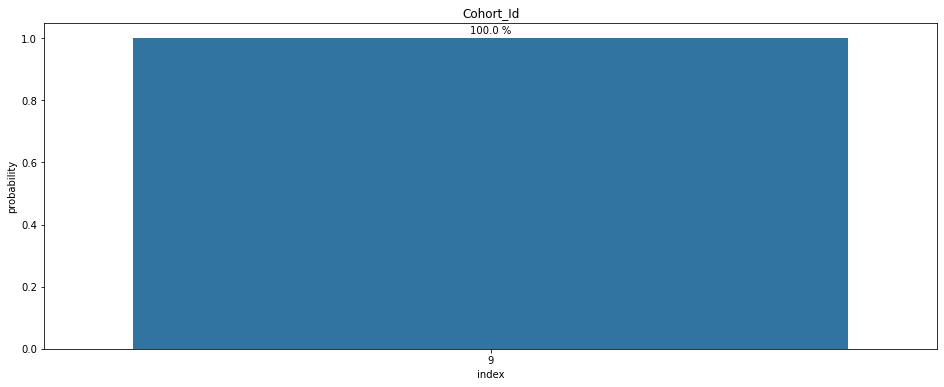

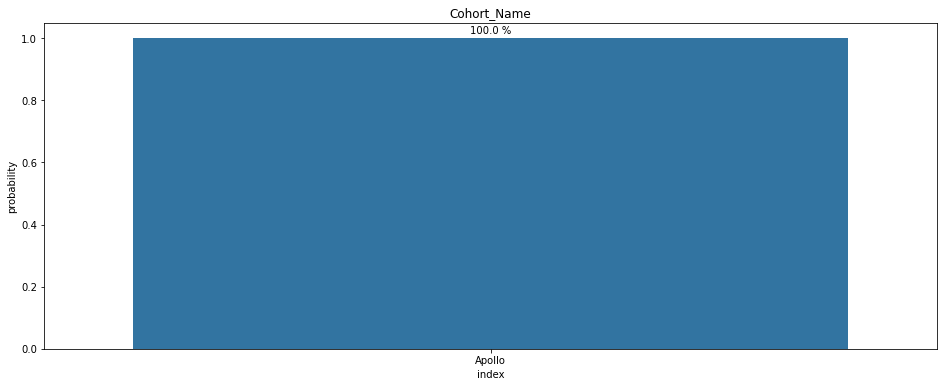

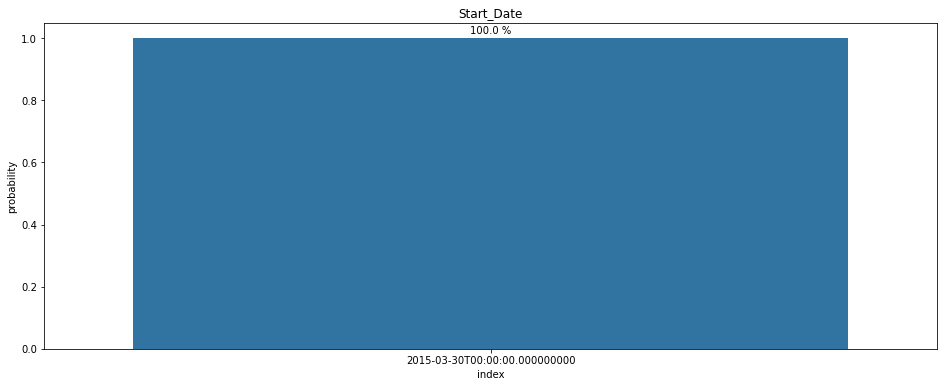

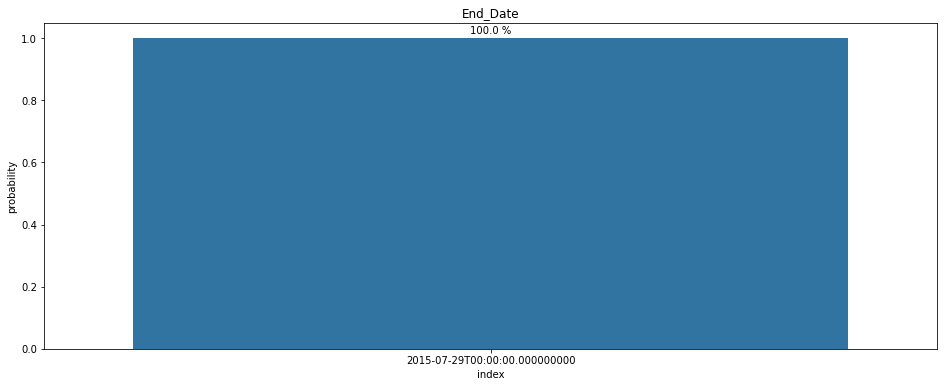

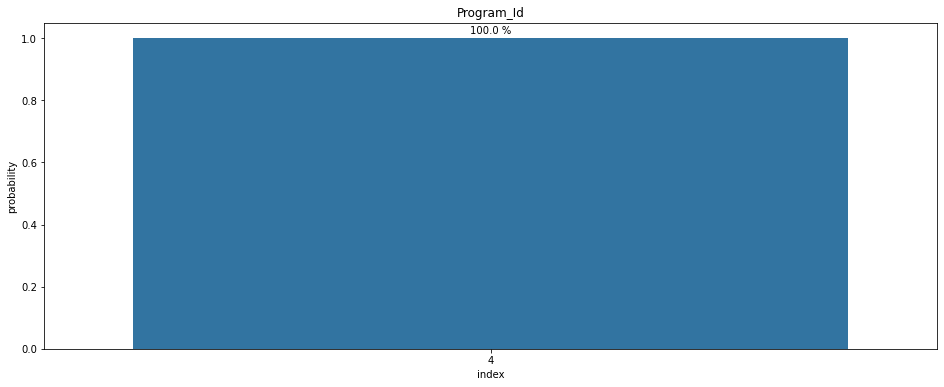

In [364]:
for col in post_prog_4.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=post_prog_4[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

## Program 1: Post Graduation, graduates are most likely going to access: Javascript-i,HTML-CSS,spring                                                  


## Program 2: Post Graduation, graduates are most likely going to access: Javascript-i, Spring, HTML-CSS                               
   

## Program 3: Post Graduation, graduates are most likely going to access: sql/mysql-overview, classification/overview, anomaly-detection/overview 

